<font size=5>**Финальный проект по анализу данных**

<font size=8>**ИCСЛЕДОВАНИЕ MNP В РОССИИ**

Мой проект посвящен анализу переносов пользователями сотовой связи своих мобильных номеров (MNP) между операторами. Услуга MNP была запущена в Российской Федерации в 2013 году. Единым государственным оператором по регистрации MNP является Научно-исследовательский институт Радио. Эта организация управляет Базой данных перенесенных номеров (БДПН), которая отвечает за технический процесс передачи номера и поддерживает корректную маршрутизацию звонков и сообщений после этого. По данным генерального директора НИИР Олега Иванова, за 2023 год было подано порядка 16,5 млн заявок на перенос мобильного номера к другому оператору, однако удовлетворено было только 2,6 млн из них. Большинство заявок было отклонено из-за нарушений условий переноса номера: ошибки в персональных данных абонента, наличие задолженности, перенос в другой регион РФ. Всего за время существования БДПН было подано около 81 млн заявок на перенос номера, успешно перенесли 27,7 млн номеров.

Услуги сотовой связи в России предоставляют более 40 мобильных операторов. Все знают основных операторов мобильной связи (*МТС, Билайн, ТЕЛЕ2, Мегафон*), но услуги предоставляют также и региональные операторы (*МОТИВ - Свердловская область, Таттелеком - республика Татарстан* и др.). Это классические операторы сотовой связи (MNO), которые имеют собственные радиочастоты и инфраструктуру. На российском рынке сотовой связи работают более 30 виртуальных операторов мобильной связи (MVNO), которые не имеют собственной радиосети и аредуют ее у операторов MNO. Ярким примером операторов MVNO являются: *YOTA, Тинькофф Мобайл, Сбермобайл, ВТБ мобайл, Газпромбанк мобайл и др*.

<u>**Цели проекта:**</u>


1.   Провести исследование, какие MNO и MVNO оказались наиболее популярными при использовании абонентами сотовой связи услуги MNP.
2.   Изучить влияние MNP на изменение абонентских баз операторов.
3.   Провести анализ использования MNP в различных регионах Российской Федерации.
4.   Оценить популярность виртуальных мобильных операторов у пользователей сотовой связи.

<u>**Этапы проекта:**</u>


1.   Подготовка исходных данных для проекта.
2.   Исследование MNP.
3.   Выводы.



В проекте используются следующие библиотеки:
1.	pandas: для работы с данными, обработки и анализа таблиц, включая чтение и запись данных, фильтрацию, сортировку, группировку и агрегацию данных.
2.	numpy: для выполнения вычислений с массивами чисел, включая математические операции, и обработку больших объемов данных.
3.	matplotlib, seaborn: для визуализации данных, построения графиков, диаграмм и дополнительной визуальной интерпретации результатов анализа.
4.	ipywidgets: для создания интерактивных элементов управления и взаимодействия с данными в Jupyter Notebook.
5.	geopandas: для работы с географическими данными, включая загрузку, обработку и анализ пространственных данных, отображение их на карте.
6.	beautifulSoup, requests: для использования веб-скреппинга.
7.  sqlite3: для работы с базой данных и созданием справочников.
8.  datetime: для преобразования временных данных.
9.	re: для работы с регулярными выражениями, для более удобной обработки текстовых данных с помощью поиска определенных шаблонов.
10.	networkX: для построения графа.
11. scipy: для расчета p-value.
12.	sklearn: для реализации алгоритмов машинного обучения, включая предобработку данных, выбор моделей, обучение моделей и для оценки качества работы моделей.
13.	xgboost, lightgbm: для реализации алгоритма градиентного бустинга и улучшения производительности моделей машинного обучения, основанных на деревьях решений.
14. tqdm: для визуализации в виде progressbar хода выполнения программы.

Данное исследование необходимо запускать в **GOOGLE COLLAB**.

**Информация в данном исследовании является конфиденциальной и предназначена исключительно для конкретных лиц, которым оно адресовано. Перепечатка, распространение, передача исследования и всех материалов третьим лица запрещены без письменного разрешения автора.**



In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import sqlite3
import csv
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import re
from datetime import datetime as dt
from tqdm import tqdm
import matplotlib.patches as mpatches
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, AutoLocator,
                               FormatStrFormatter, Locator)
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.dates as dts
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ipywidgets as wg
import seaborn as sns
from scipy.stats import pearsonr
import networkx as nx
import scipy

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10)
dir_geo = '/content/GEO/' # GEO allocation files
dir_guide = '/content/GUIDE/' # GUIDE allocation files
dir_data_csv = '/content/DATA/CSV/'
dir_data_mnp = '/content/DATA/MNP/'
dir_data = '/content/MAIN/'
file_data = 'mnp_data.csv'

<font size=6>**Подготовка исходных данных для проекта**

*Подготовка данных* - сложный этап в реализации проекта, так как приходится создавать собственную структуру данных из различных источников информации. Несмотря на то, что я использую данные с официальных сайтов, возникает проблема их неконсистентности между собой, что требует при их объединении проведения дополнительных сверок и анализа. Иногда при создании справочников, вместо парсинга информации проще и быстрее создать их вручную. Я произвела загрузку данных с официальных сайтов (ссылки на источники будут указаны для каждого файла) заранее и разместила их в репозитории GitHUB. В процессе реализации проекта я буду загружать файлы из репозитория для их дальнейшей обработки.<br><br>Этапы подготовки исходных данных:

1.   Создание справочника плана нумерации DEF-9хх мобильных номеров с распределением по регионам РФ и операторам сотовой связи.
2.   Создание и загрузка в БД SQL дополнительных справочников:
  * операторы мобильной связи, предоставляющие услуги сотовой связи на территории РФ.
  * регионы РФ.
3.  Подготовка и создание файла с геоданными регионов РФ.
4.  Создание основного Dataframe с данными по переносам мобильных телефонных номеров.



<hr size="3" color="black" />

**ПОДГОТОВКА ИСХОДНЫХ ДАННЫХ ДЛЯ ПРОЕКТА.** Создание справочника плана нумерации DEF-9хх мобильных номеров.

Для создания справочника мы будем использовать следующие файлы:<br>

1.   DEF-9xx.csv - загружен с сайта [Министерства цифрового развития, связи и массовых коммуникаций Российской Федерации](https://opendata.digital.gov.ru/). Ссылка на загрузку файла [DEF-9xx.csv](https://opendata.digital.gov.ru/downloads/DEF-9xx.csv?1714803105928).
2.   number_range_auto-16_04_2024.csv - загружен с сайта официального единого оператора РФ по переносу мобильных номеров (MNP) [НИИ Радио](https://www.niir.ru/). Ссылка на загрузку файлов: [number_range_auto-хх_хх_2024.csv](https://www.niir.ru/bdpn/tablica-marshrutnyh-nomerov/). На сайте НИИР хранятся файлы  за последние 8 дней. Мой файл уже не доступен, но это не по повлияет на подготовку данных, так как изменения файлов связаны с выделением дополнительной номерной емкости операторам или назначением новых MNC кодов.<br>
*Задача:* создать справочник **def_mnc.csv** со структурой, необходимой для дальнейшей обработки файлов переносов. Загружаем файлы из репозитория GitHUB в ZIP-архиве для дальнейшей обработки.


In [2]:
!mkdir -p GUIDE
!wget -q https://github.com/VolodinaEA/MNP/raw/main/DATA/def_mnc_router.zip
!unzip -o def_mnc_router.zip -d /content/GUIDE
!rm def_mnc_router.zip

Archive:  def_mnc_router.zip
  inflating: /content/GUIDE/number_range_auto-16_04_2024.csv  
  inflating: /content/GUIDE/DEF-9xx.csv  


Производим обработку загруженных файлов и создаем справочник **def_mnc.csv**.

In [3]:
def_file = 'DEF-9xx.csv' # DEF allocation file
def_allocation = pd.read_csv(dir_guide + def_file, sep=';', encoding='utf8',
                             names=['_def', 'start', 'end', 'count', 'operator', 'reg', 'region', 'inn'])
print(def_allocation)

       _def    start      end   count           operator                                         reg                                        region         inn
0       900        0    61999   62000    ООО "Т2 Мобайл"                          Краснодарский край                            Краснодарский край  7743895280
1       900    62000    62999    1000    ООО "Т2 Мобайл"                             Ростовская обл.                            Ростовская область  7743895280
2       900    63000    99999   37000    ООО "Т2 Мобайл"                          Краснодарский край                            Краснодарский край  7743895280
3       900   100000   199999  100000    ООО "Т2 Мобайл"                               Тверская обл.                              Тверская область  7743895280
4       900   200000   299999  100000    ООО "Т2 Мобайл"                            Челябинская обл.                           Челябинская область  7743895280
...     ...      ...      ...     ...         

Для демонстрации использования веб-скреппинга с помощью **beautifulsoup** загрузим аналогичную таблицу с сайта: [https://static.mts.ru/uploadmsk/contents/1655/Kody_DEF-9kh.htm](https://static.mts.ru/uploadmsk/contents/1655/Kody_DEF-9kh.htm).

In [4]:
url = 'https://static.mts.ru/uploadmsk/contents/1655/Kody_DEF-9kh.htm'
def_file_mts = 'def_allocation_mts.csv'
if urlopen(url).getcode() == 200:
    page = urlopen(url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    def_allocation_mts = []
    table = soup.find('table')
    for row in table.find_all('tr', attrs={'valign':None}):
        col = row.find_all('td')
        def_item = []
        for i in col: def_item.append(i.get_text().strip())
        def_allocation_mts.append(def_item)
    with open(def_file_mts, 'w', newline='', encoding='utf-8') as file:
        csv.writer(file).writerows(def_allocation_mts)

        df_allocation_mts = pd.read_csv(def_file_mts, sep=',', encoding='utf8',
                             names=['_def', 'start', 'end', 'count', 'operator', 'reg'])
        print(df_allocation_mts)
else: print('Attention! url: {} unavailable'.format(url))

      _def    start      end   count                 operator                             reg
0      900        0    99999  100000          ООО "Т2 Мобайл"              Краснодарский край
1      900   100000   199999  100000          ООО "Т2 Мобайл"                   Тверская обл.
2      900   200000   299999  100000          ООО "Т2 Мобайл"                Челябинская обл.
3      900   300000   499999  200000  ООО "ЕКАТЕРИНБУРГ-2000"               Свердловская обл.
4      900   500000   599999  100000          ООО "Т2 Мобайл"                Кемеровская обл.
...    ...      ...      ...     ...                      ...                             ...
7972   999  7799000  7799999    1000          ООО "Т2 Мобайл"  г. Москва и Московская область
7973   999  7800000  7802999    3000            ООО "Скартел"                   Тверская обл.
7974   999  7803000  7842999   40000            ООО "Скартел"                   Тульская обл.
7975   999  7843000  7854999   12000            ООО "Скартел

Загрузка `number_range_auto-16_04_2024.csv`.

In [5]:
router_file = 'number_range_auto-16_04_2024.csv' # Router table file
router = pd.read_csv(dir_guide + router_file, sep=';', encoding='utf8',
                     names=['_def', 'start', 'end', 'count', 'operator', 'id_region', 'mnc', 'router_number'])
print(router)

       _def    start      end   count           operator  id_region  mnc router_number
0       900        0    61999   62000    "Т2 Мобайл" ООО         25   20         D2520
1       900    62000    62999    1000    "Т2 Мобайл" ООО         62   20         D6220
2       900    63000    99999   37000    "Т2 Мобайл" ООО         25   20         D2520
3       900   100000   199999  100000    "Т2 Мобайл" ООО         70   20         D7020
4       900   200000   299999  100000    "Т2 Мобайл" ООО         75   20         D7520
...     ...      ...      ...     ...                ...        ...  ...           ...
14385   999  9480000  9489999   10000  "СИМ ТЕЛЕКОМ" ООО         77   47         D7747
14386   999  9490000  9499999   10000      "МегаФон" ПАО         14    2         D1402
14387   999  9500000  9599999  100000  "СИМ ТЕЛЕКОМ" ООО         77   47         D7747
14388   999  9600000  9799999  200000      "Скартел" ООО         77   11         D7711
14389   999  9800000  9999999  200000      

Создаем справочник **def_mnc.csv**.

In [6]:
def_allocation.drop(['reg', 'count', 'region'], axis=1, inplace=True)
def_allocation['operator'] = def_allocation['operator'].str.upper()
router['operator'] = router['operator'].str.upper()
def_mnc = router.merge(def_allocation, on=['_def', 'start', 'end'], how='left')
def_mnc.update(def_mnc.operator_x.str.extract('"([^"]*)"', expand=False))

# Список операторов мобильной связи
operator = def_allocation[['operator', 'inn']].drop_duplicates()
operator['name'] = operator['operator']
operator.update(operator.operator.str.extract('"([^"]*)"', expand=False))
operator['oper'] =operator['operator']
operator.sort_values('name', inplace=True)
operator.set_index('operator', inplace=True)
operator.sort_values('oper', inplace=True)
# Проводим согласование названий операторов мобильной связи
operator_dict = operator.transpose().to_dict('dict')
operator_dict['ДЭНИ КОЛЛ'] = {'inn' : 4345404971, 'name' : 'ДЭНИ КОЛЛ', 'oper' : 'ДЭНИ КОЛЛ'}
operator_dict['МЕЖРЕГИОНАЛЬНЫЙ ТРАНЗИТТЕЛЕКОМ'] = {'inn' : 7743895280, 'name' : 'МЕЖРЕГИОНАЛЬНЫЙ ТРАНЗИТТЕЛЕКОМ', 'oper' : 'МТТ'}
operator_dict['РЕСПУБЛИКАНСКИЙ ОПЕРАТОР СВЯЗИ'] = {'inn' : 9308013351, 'name' : '"Республиканский Оператор Связи" ГУП ДНР', 'oper' : 'ГУП ДНР РОС'}
operator_dict['СВЯЗЬРЕСУРС-МОБАЙЛ'] = {'inn' : 2310199816, 'name' : 'OOO СВЯЗЬРЕСУРС-МОБАЙЛ"', 'oper' : 'СВЯЗЬРЕСУРС-МОБАЙЛ'}
# Проводим update dataframe def_mnc (добавляем новые поля, заполняем поля с NaN)
for index, row in def_mnc.loc[def_mnc.isnull().any(axis=1)].iterrows():
    if row['operator_x'] in operator_dict:
        def_mnc.at[index, 'operator_y'] = operator_dict[row['operator_x']]['oper']
        def_mnc.at[index, 'inn'] = operator_dict[row['operator_x']]['inn']
def_mnc.drop(['router_number', 'operator_y'], axis=1, inplace=True)
def_mnc.rename(columns = {'operator_x' : 'operator'}, inplace = True )
# Проводим унификацию наименований операторов мобильной связи
operator_dict = {'МЕЖРЕГИОНАЛЬНЫЙ ТРАНЗИТТЕЛЕКОМ' : 'МТТ', 'МОБИЛЬНЫЕ ТЕЛЕСИСТЕМЫ' : 'МТС', 'НОВЫЕ МОБИЛЬНЫЕ КОММУНИКАЦИИ' : 'ГАЗПРОМБАНК МОБАЙЛ',
                 'РЕСПУБЛИКАНСКИЙ ОПЕРАТОР СВЯЗИ' : 'ДНР РОС', 'КОМПАНИЯ ТРАНСТЕЛЕКОМ' : 'ТРАНСТЕЛЕКОМ',
                 'МОБИЛЬНЫЕ КОММУНИКАЦИОННЫЕ СИСТЕМЫ' : 'МКС'}
for i in operator_dict:
    def_mnc.loc[def_mnc['operator'] == i, 'operator'] = operator_dict[i]
def_mnc['inn']=def_mnc['inn'].astype('int64')
print(def_mnc)
# Сохраняем полученный справочник в файле 'def_mnc.csv'
def_mnc.to_csv(dir_guide + 'def_mnc.csv')

       _def    start      end   count     operator  id_region  mnc         inn
0       900        0    61999   62000    Т2 МОБАЙЛ         25   20  7743895280
1       900    62000    62999    1000    Т2 МОБАЙЛ         62   20  7743895280
2       900    63000    99999   37000    Т2 МОБАЙЛ         25   20  7743895280
3       900   100000   199999  100000    Т2 МОБАЙЛ         70   20  7743895280
4       900   200000   299999  100000    Т2 МОБАЙЛ         75   20  7743895280
...     ...      ...      ...     ...          ...        ...  ...         ...
14385   999  9480000  9489999   10000  СИМ ТЕЛЕКОМ         77   47  7707840631
14386   999  9490000  9499999   10000      МЕГАФОН         14    2  7812014560
14387   999  9500000  9599999  100000  СИМ ТЕЛЕКОМ         77   47  7707840631
14388   999  9600000  9799999  200000      СКАРТЕЛ         77   11  7701725181
14389   999  9800000  9999999  200000      СКАРТЕЛ         77   11  7701725181

[14390 rows x 8 columns]


Значения хранящиеся в колонках:


*   _def - def код телефонного номера
*   start, end - диапазон телефонных номеров
*   count - количество распределенных номеров
*   operator - оператор мобильной связи
*   id_region - номер региона РФ
*   mnc - код сети мобильного оператора
*   inn - ИНН мобильного оператора

Дополнительно создаем предварительную версию справочника **operators** и сохраняем его в формате **xlsx** для дальнейшей обработки вручную.

In [7]:
# Creating a list of operators 'operator_list.csv'
operator_list = def_mnc[['operator', 'mnc', 'inn']].drop_duplicates()
operator_list.sort_values('operator', inplace=True)
operator_list['inn'] = operator_list['inn'].astype('int64')
operator_list['type'] = 'mvno'
operator_list['brend'] = 'brend'
operator_list = operator_list.iloc[:, [0, 1, 3, 4, 2]]
operator_list.reset_index(drop=True, inplace=True)
print(operator_list)
operator_list.to_excel(dir_guide + 'operators.xlsx')

           operator  mnc  type  brend         inn
0           АНТАРЕС   28  mvno  brend  7715650666
1            АСТРАН   18  mvno  brend  7717647570
2          БЕЗЛИМИТ   55  mvno  brend  9725007063
3    ВАЙНАХ ТЕЛЕКОМ    8  mvno  brend  2005503932
4             ВИКОМ   20  mvno  brend  7451318173
..              ...  ...   ...    ...         ...
67  ТРИВОН НЕТВОРКС   20  mvno  brend  5054086236
68        ТТК-СВЯЗЬ   20  mvno  brend  7709362765
69         ЦЕНТР 2М   51  mvno  brend  7704330696
70  ЭКСПРЕСС МОБАЙЛ   20  mvno  brend  6163225548
71    ЭЛЕМТЭ-ИНВЕСТ   33  mvno  brend  1660101110

[72 rows x 5 columns]


<hr size="3" color="black" />

**ПОДГОТОВКА ИСХОДНЫХ ДАННЫХ ДЛЯ ПРОЕКТА.** Создание и загрузка в БД SQL дополнительных справочников: **operators** и **regions**.

Справочник **operators** - ключевой справочник моего проекта. Несмотря на все разнообразие информации в интернете, я не смогла найти информацию о всех операторах сотовой связи в необходимом мне формате.<br>Все знают основных операторов мобильной связи (*МТС, Билайн, ТЕЛЕ2, Мегафон*), но услуги предоставляют также и региональные операторы (*МОТИВ - Свердловская область, Таттелеком - республика Татарстан* и др.). Это классические операторы сотовой связи (MNO), которые имеют собственные радиочастоты и инфраструктуру. На российском рынке сотовой связи работают более 30 виртуальных операторов мобильной связи (MVNO), которые не имеют собственной радиосети и аредуют ее у операторов MNO. Ярким примером операторов MVNO являются: *YOTA, Тинькофф Мобайл, Сбермобайл, ВТБ мобайл, Газпромбанк мобайл и др*.<br> MVNO, в зависимости от развития технологической инфраструктуры, делятся на несколько типов: *reseller, service provider, enhanced service provider и full mvno*.<br><br>
Ключевым признаком переноса телефонного номера является **MNC (код сети)** оператора, к которому переносится номер. Многие операторы MNO работают под несколькими MNC в разных регионах РФ. Это "наследие" развития телеком компаний, которые покупали региональных операторов. Что касается MVNO, то нам достаточно разделить их на две группы: mvno и fullmvno. Первая группа не имеет собственного кода сети и использует MNC host сети MNO, вторая группа имеет собственный MNC и фактически является полноценным оператором сотовой связи за исключеним наличия систем радиодоступа. Наличие в справочнике информации об MNC и типе оператора (mno, fullmvno, mvno) позволит нам однозначно отслеживать перенос номера от одного оператора к другому, от одного типа операторов к другому типу операторов. В этом состоит ценность созданного мной справочника.<br>Загрузим справочник из репозитария GitHUB и поместим его в SQL таблицу.

In [8]:
!wget -N -q https://github.com/VolodinaEA/MNP/raw/main/DATA/operators.csv -P /content/GUIDE/
operator_file = 'operators.csv' # Справочник мобильных операторов России
# Создаем подключение к базе данных (файл mnp.db будет создан)
conn = sqlite3.connect('/content/mnp.db')
cur = conn.cursor()
cur.execute('''DROP TABLE IF EXISTS operators;''')
create_table = '''CREATE TABLE "operators" ("id" INTEGER PRIMARY KEY AUTOINCREMENT, "operator"	TEXT, "mnc"	INTEGER,
                  "type"	INTEGER, "brend"	TEXT, "inn"	INTEGER)'''
cur.execute(create_table)
file = open(dir_guide + operator_file, encoding='utf-8')
contents = csv.reader(file, delimiter=';')

new_records = "INSERT INTO operators (operator, mnc, type, brend, inn) VALUES(?, ?, ?, ?, ?)"
cur.executemany(new_records, contents)
cur.execute('''DELETE FROM operators  WHERE id IN (SELECT id FROM operators LIMIT 1)''')
conn.commit()

operator_list = pd.read_sql_query('SELECT * FROM operators', conn)
print(operator_list)
conn.close()

    id     operator  mnc      type       brend         inn
0    2  ИК СИБИНТЕК    1      mvno    СИБИНТЕК  7708119944
1    3         МГТС    1      mvno        МГТС  7710016640
2    4          МТС    1       mno         МТС  7740000076
3    5      МЕГАФОН    2       mno     МЕГАФОН  7812014560
4    6    Т2 МОБАЙЛ    3       mno       ТЕЛЕ2  7743895280
..  ..          ...  ...       ...         ...         ...
64  66      ГЛОНАСС   77  fullmvno     ГЛОНАСС  7703383783
65  67   МИРТЕЛЕКОМ   94       mno  МИРТЕЛЕКОМ  9102282270
66  68      ДНР РОС   97       mno     ДНР РОС  9308013351
67  69          МКС   98       mno         МКС  9402011009
68  70    ВЫМПЕЛКОМ   99       mno      БИЛАЙН  7713076301

[69 rows x 6 columns]


Значения, хранящиеся в колонках:

*   id - уникальный номер
*   name - наименование оператора мобильной связи
*   mnc - код MNC
*   type - тип оператора
*   brend - бренд, под которым оказывает услуги оператор
*   inn - ИНН оператора







Справочник с данными по регионам РФ я сделала самостоятельно. Это было проще, чем делать парсинг в интернете и приводить к единому внешнему виду. Аналогичным образом загружаем справочник **regions**.

In [9]:
!wget -N -q https://github.com/VolodinaEA/MNP/raw/main/DATA/regions.csv -P /content/GUIDE/
region_file = 'regions.csv' # Справочник мобильных операторов России
conn = sqlite3.connect('/content/mnp.db')
cur = conn.cursor()
cur.execute('''DROP TABLE IF EXISTS regions;''')
create_table = '''CREATE TABLE "regions" ("id" INTEGER PRIMARY KEY AUTOINCREMENT, "id_region"	INTEGER, "region"	TEXT,
                  "federal_district"	TEXT, "population"	INTEGER)'''
cur.execute(create_table)
file = open(dir_guide + region_file, encoding='utf-8')
contents = csv.reader(file, delimiter=';')

new_records = "INSERT INTO regions (id_region, region, federal_district, population) VALUES(?, ?, ?, ?)"
cur.executemany(new_records, contents)
cur.execute('''DELETE FROM regions WHERE id IN (SELECT id FROM regions LIMIT 1)''')
conn.commit()

region_list = pd.read_sql_query('SELECT * FROM regions', conn)
region_list.drop('id', axis= 1 , inplace= True)
print(region_list)
conn.close()

    id_region                           region   federal_district  population
0           4                 Республика Алтай          Сибирский      210769
1          60                Псковская область    Северо-Западный      587786
2          23               Краснодарский край              Южный     5819345
3           9  Карачаево-Черкесская Республика  Северо-Кавказский      468444
4           7  Кабардино-Балкарская Республика  Северо-Кавказский      903266
..        ...                              ...                ...         ...
80         59                    Пермский край        Приволжский     2508352
81         63                Самарская область        Приволжский     3142683
82         26              Ставропольский край  Северо-Кавказский     2891204
83          1                Республика Адыгея              Южный      497985
84         87       Чукотский автономный округ    Дальневосточный       47840

[85 rows x 4 columns]


Значения хранящиеся в колонках:
*   id_region - номер региона
*   region - наименование региона
*   federal_district - федеральный округ РФ
*   population - численность населения в регионе

<hr size="3" color="black" />



**ПОДГОТОВКА ИСХОДНЫХ ДАННЫХ ДЛЯ ПРОЕКТА.** Подготовка и создание файла с геоданными регионов РФ.

Для создания справочника с геоданными регионов РФ я буду использовать следующие данные:
*   ранее подготовленный справочник **regions**
*   Файл **russia.json**, загруженный с сайта https://simplemaps.com/gis/country/ru в формате shapefile и преобразованный в формат GeoJSON. Из этого файла будем использовать только геоданные. В процессе анализа данного файла, выяснилось, что в этом файле 'обрезанная' Чукотка.
*   Полные геоданные по Чукотскому автономнуму округу возьмем из Файл **chukotskiy.geojson**, загруженного из репозитария GitHUB [ссылка на файл](https://github.com/simp37/Russia_geoJSON/blob/master/Chukotskiy.geojson).


Загрузим два последних файла из нашего репозитария GitHUB в архиве ZIP и распакуем в папку /content/GEO

In [10]:
!mkdir -p GEO
!wget -q https://github.com/VolodinaEA/MNP/raw/main/DATA/geo.zip
!unzip -o geo.zip -d /content/GEO
!rm geo.zip

Archive:  geo.zip
  inflating: /content/GEO/russia.json  
  inflating: /content/GEO/chukotskiy.geojson  


Создадим:
*   Dataframe **gdf** с необходимыми данными для визуализации в нашем проекте.
*   Файл **map_russia.json**.

In [11]:
# Загружаем в Dataframe данные из файла 'russia.json'.
# Это будет наш основной Dataframe.
file_geo = 'russia.json' # GEO file
gdf = gpd.read_file(dir_geo + file_geo)
gdf.head(4)

,id,name,source,geometry
0,RUAL,Gorno-Altay,https://simplemaps.com,"POLYGON ((84.08860 50.63461, 84.18280 50.66063..."
1,RUPSK,Pskov,https://simplemaps.com,"POLYGON ((27.69589 58.97718, 27.74201 58.97937..."
2,RUKDA,Krasnodar,https://simplemaps.com,"POLYGON ((38.67353 46.86295, 38.69049 46.82148..."
3,RUKC,Karachay-Cherkess,https://simplemaps.com,"POLYGON ((40.68997 43.52313, 40.70277 43.59029..."


In [12]:
gdf = gdf[['geometry']] # оставляем в Dataframe только геоданные

file_geo = 'chukotskiy.geojson' # загружаем в Dataframe данные из файла 'chukotskiy.geojson'
df1 = gpd.read_file(dir_geo + file_geo)

df = pd.read_csv(dir_guide + 'regions.csv', encoding='utf8', sep=';')

# добавляем в основной файл данные из справочника 'regions': код региона, название региона, название федерального округа, численность населения.
gdf = pd.merge(gdf, df, left_index=True, right_index=True)

# Заменяем геоданные по Чукотке в основном файле из файла 'chukotskiy.geojson'.
gdf.loc[gdf['region']=='Чукотский автономный округ', ['geometry']] = df1['geometry'].values[0]
gdf.reset_index(inplace=True, drop=True)
gdf.to_crs(epsg=32646, inplace=True)

# Сохраняем полученный Dataframe в файл 'map_russia.json', который будем использовать в дальнейшем
gdf.to_file(dir_geo + 'map_russia.json', driver='GeoJSON')

Получаем следующий Dataframe с геоданными:

In [13]:
gdf.head(4)

,geometry,id_region,region,federal_district,population
0,"POLYGON ((-129704.411 5647192.009, -122712.291...",4,Республика Алтай,Сибирский,210769
1,"POLYGON ((-2745392.757 8424946.442, -2743730.7...",60,Псковская область,Северо-Западный,587786
2,"POLYGON ((-3499470.294 6805440.056, -3502332.6...",23,Краснодарский край,Южный,5819345
3,"POLYGON ((-3670832.954 6347636.261, -3663826.5...",9,Карачаево-Черкесская Республика,Северо-Кавказский,468444


Используем созданный файл с геоданными для отображения карты Российской Федерации с группировкой регионов по федеральным округам.

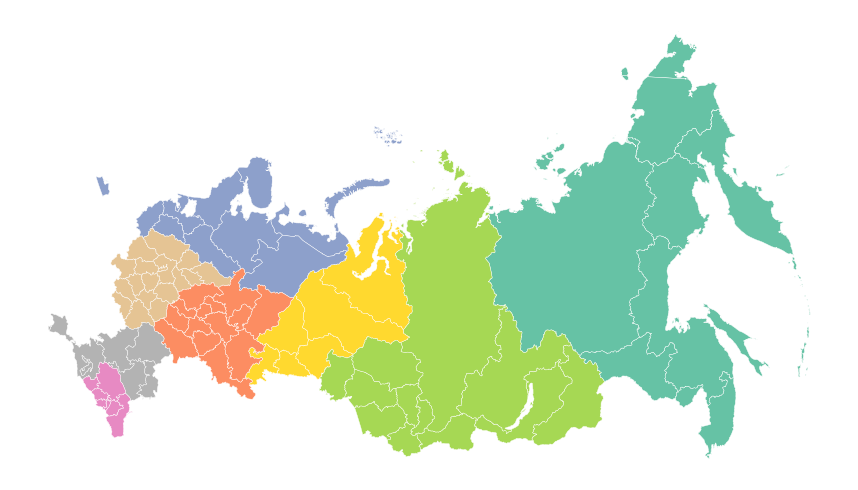

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))

gdf.plot(column='federal_district', cmap='Set2', ax=ax, linewidth=0.3, edgecolor='white')
ax.set_axis_off()
fig.tight_layout()
plt.show()

<hr size="3" color="black" />

**ПОДГОТОВКА ИСХОДНЫХ ДАННЫХ ДЛЯ ПРОЕКТА.** Создание основного Dataframe с данными по переносам мобильных телефонных номеров.

Технология регистрации переноса телефонного номера (Mobile Number Portability (MNP)) выгдядит следующим образом:
*   Абонент оформляет заявление на перенос номера.
*   При выполнении условий переноса номера заявление поступает к единому оператору MNP [НИИ Радио](https://www.niir.ru/). ВАЖНЫЕ УСЛОВИЯ MNP: **переносить номер можно только в пределах одного региона, можно переносить номера только в коде DEF-9xx!**
*   НИИР ежедневно формирует файл mnpYYMMDD.csv с переносами номеров и рассылает его всем операторам связи.
*   Операторы связи, на основании полученной информации, настраивают маршрутизацию на перенесенные номера.<br><br>Загрузим из нашего репозитория GitHUB пример такого файла и посмотрим как он выглядит.



In [15]:
!wget -N -q https://github.com/VolodinaEA/MNP/raw/main/DATA/mnp231028.csv
df = pd.read_csv('mnp231028.csv', encoding='utf8', names=['phone', 'mcc', 'mnc'])
df.head(4)

,phone,mcc,mnc
0,phone = 79935293458,mcc = 250,mnc = 11
1,phone = 79033101929,mcc = 250,mnc = 11
2,phone = 79958642628,mcc = 250,mnc = 11
3,phone = 79121642452,mcc = 250,mnc = 45


Значения, хранящиеся в колонках:
*   phone - телефонный номер, который будет переноситься.
*   mcc - мобильный код страны (Mobile Country Code). Для РФ MCC = 250. В процессе анализа я выяснила, что НИИР также обслуживает переносы номеров для Казахстана (MCC = 400). В дальнейшем я исключу данные для Казахстана.
*   mnc - код мобильного оператора, к которому будет переносится номер.

Общая схема создания итогового Dataframe из файла переносов НИИ Радио с использованием ранее созданных справочников **def_mnc** и **operators** выглядит следующим образом:
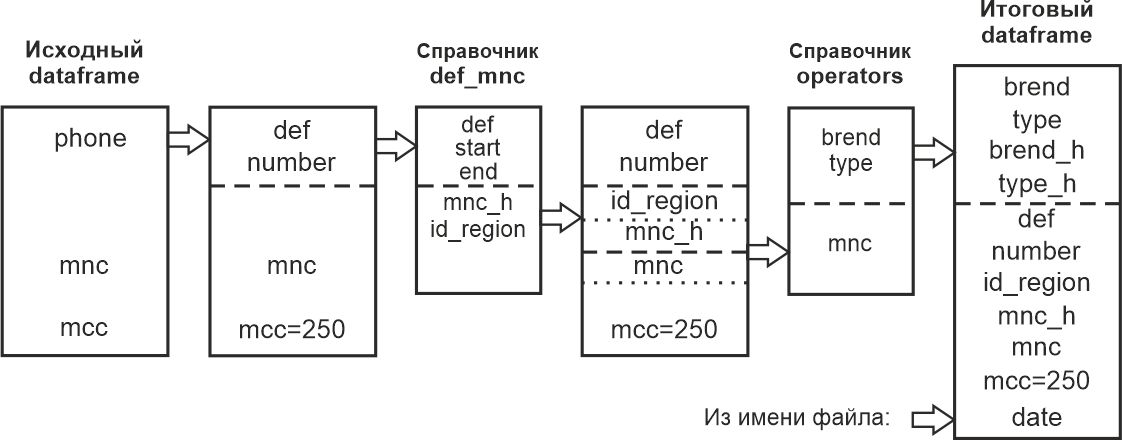

**Получение оригинальных файлов переносов номеров.**<br>
НИИ Радио не предоставляет эту информацию физическим лицам. Я обратилась на сайт [htmlweb.ru](https://htmlweb.ru/), который предлагает на платной основе получить текущую принадлежность телефонного номера с просьбой предоставить исходные файлы с переносами номеров. Мне пошли навстречу и разрешили скачать файлы csv со следующей [страницы](https://htmlweb.ru/sendsms/mnp.php).<br>
Сделаем ***парсинг*** данных с этой страницы и получим список файлов для дальнейшей загрузки, используя ***API***.

In [16]:
url = 'https://htmlweb.ru/sendsms/mnp.php'
st1, st2 = 'https://htmlweb.ru', '?api_key='
api_key = '8840027357d012eab67688d19f619eee'

def test_url(url):
    try:
        if requests.get(url).status_code == 200:
            return True
        else:
            print(f'{url}: is Not reachable')
            return False
    except requests.exceptions.RequestException as e:
        raise SystemExit(f"{url}: is Not reachable \nErr: {e}")

if test_url(url):
  list_files =[]
  soup = BeautifulSoup(urlopen(url).read().decode('utf-8'), 'html.parser')
  for paragraph in soup.find_all("div", {'class': 'w100'}):
    for i in paragraph('a'):
        if '.csv' in i.get('href'): list_files.append(st1 + i.get('href') + st2 + api_key)
  print(f'Пример данных в списке list_files: {list_files[0]}')
  print(f'Количество файлов в списке: {len(list_files)}')

Пример данных в списке list_files: https://htmlweb.ru/api/mnp/download/mnp240507.csv?api_key=8840027357d012eab67688d19f619eee
Количество файлов в списке: 177


Загрузка исходных файлов переноса мобильных номеров с [htmlweb.ru](https://htmlweb.ru/). Доступ для меня был открыт кратковременно. Нижеприведенный код выложен в подтверждение возможности автоматической загрузки по ***API***.<br>
<font color='red'>!!! НЕ ЗАПУСКАЙТЕ НИЖЕПРИВЕДЕННЫЙ КОД

In [ ]:
!rm -r -f /content/DATA/CSV
!mkdir -p /content/DATA/CSV
for i in list_files:
    response = requests.get(i)
    name = re.search(r'(.*?)\?', i.split('/')[-1]).group(1)
    with open(dir_data_csv + name, "wb") as f:
        f.write(response.content)

Загрузка исходных MNP файлов (я их скачала ранее) из моего репозитария GitHUB:

In [17]:

!rm -r -f /content/DATA/CSV
!mkdir -p /content/DATA/CSV
!wget -q https://github.com/VolodinaEA/MNP/raw/main/DATA/niir_mnp.zip
!unzip -o -q niir_mnp.zip -d /content/DATA/CSV/
!rm niir_mnp.zip

Создадим функцию для преобразования исходных MNP файлов в требуемый нам формат.

In [18]:
def get_data(name_file):
    date = dt.strptime('20' + re.search(r'\d{2}\d{2}\d{2}', name_file).group(), '%Y%m%d').strftime('%Y-%m-%d')
    data_file = 'data_{}.{}'.format(str(date), 'csv') # Выходной файл

    def get_mnc(defcode, number):
        mnc = def_mnc.iloc[np.where((def_mnc._def == defcode) & ((def_mnc.start <= number) & (def_mnc.end >= number)))][:1]
        return mnc.mnc.values[0], mnc.id_region.values[0]

    # Preparation Dataframe number_move (MNP)
    number_move = pd.read_csv(dir_data_csv + name_file, encoding='utf8', names=['phone', 'mcc', 'mnc'])
    for col in number_move: # deleting characters in all columns
        number_move[col] = number_move[col].str.replace(r'\D', '', regex=True)
    number_move['defcode'] = number_move['phone'].str[1:4]
    number_move['number'] = number_move['phone'].str[4:]
    number_move[['mcc', 'mnc', 'phone', 'defcode', 'number']] = number_move[['mcc', 'mnc', 'phone', 'defcode', 'number']].apply(pd.to_numeric)
    number_move = number_move[number_move.mcc.isin([250])]
    number_move = number_move[number_move.mnc.isin(current_mnc)] # remove error mnc

    number_move[['mnc_h','id_region']] = number_move.apply(lambda x: get_mnc(x.defcode, x.number), axis=1, result_type="expand")
    number_move['brend_h'] = number_move['mnc_h'].map(operator_list.set_index('mnc')['brend'])
    number_move['type_h'] = number_move['mnc_h'].map(operator_list.set_index('mnc')['type'])
    number_move['brend'] = number_move['mnc'].map(operator_list.set_index('mnc')['brend'])
    number_move['type'] = number_move['mnc'].map(operator_list.set_index('mnc')['type'])
    number_move['date'] = date
    number_move = number_move.iloc[:, [11, 1, 0, 3, 4, 5, 7, 8, 2, 9, 10, 6]]
    number_move['goback'] = np.where((number_move['mnc_h'] == number_move['mnc']), True, False)
    number_move.dropna(inplace=True)

    number_move.to_csv(dir_data_mnp + data_file, index=False)

    #print(number_move)
    return

Выполним преобразование всех ранее загруженных файлов c MNP данными и объединим их в один файл.Для отслеживания этих процессов будем использовать progressbar из модуля **tqdm**. <br>
<font color='red'>**!!! Внимание данная операция выполняется около 20 минут.**<br>
<font color='black'> В дальнейшем я загружу основной файл (который я подготовила в google colab и сохранила) из репозитрия GitHUB.

In [ ]:
!rm -r -f /content/DATA/MNP
!mkdir -p /content/DATA/MNP
def_mnc_file = 'def_mnc.csv' # Справочник распределения DEF номеров, MNC кодов и операторов по регионам
operator_file = 'operators.csv' # Справочник мобильных операторов России
merge_dir = '/content/DATA/'
data_file = 'mnp_data.csv'

def_mnc = pd.read_csv(dir_guide + def_mnc_file, encoding='utf8')

# Preparation operation_list
operator_list = pd.read_csv(dir_guide + operator_file, encoding='utf8', sep=';')
mask = ['mno', 'fullmvno']
operator_list = operator_list[operator_list.type.isin(mask)]
current_mnc = operator_list.mnc.unique().tolist()

# Преобразование файлов
list_files_csv = os.listdir(dir_data_csv)
for i in tqdm(list_files_csv, position=0, leave=True, desc='Преобразование файлов: '):
  get_data(i)
  #pass

# Объединение файлов
list_files_mnp = os.listdir(dir_data_mnp)
merge_dir = '/content/DATA/'
merge_file = 'mnp_data.csv'
first_file = True
with open(f'{merge_dir}{data_file}', 'w', encoding='utf-8') as output_file:
    for f in tqdm(list_files_mnp, position=0, leave=True, desc='   Объединение файлов: '):
        with open(dir_data_mnp + f, 'r', encoding='utf-8') as input_file:
            if not first_file: next(input_file)
            for line in input_file:
                output_file.write(line)
            first_file = False


   Объединение файлов: 100%|██████████| 174/174 [00:01<00:00, 133.84it/s]


На этом подготовка исходных данных для проекта закончена.
<hr size="3" color="black" />

<font size=6>**Исследование MNP**

Этапы исследования:


1.   Анализ общих характеристик MNP.
2.   Исследование влияния MNP на изменение абонентских баз мобильных операторов.
3.   Исследование использования абонентами услуги MNP на территории Российской Федерации. Работа с геоданными.
4.   Исследование связи между переменными.
5.   Построение Graph с использованием библиотеки networkx.
6.   Машинное обучение.


<hr size="3" color="black" />

Загрузим основные данные с переносами телефонных номеров из репозитария GitHUB и поместим данные в Dataframe **data**.

In [19]:
!mkdir -p /content/MAIN
!wget -q https://github.com/VolodinaEA/MNP/raw/main/DATA/mnp_data.zip
!unzip -o mnp_data.zip -d /content/MAIN/
!rm mnp_data.zip

data = pd.read_csv(dir_data + file_data, encoding='utf8')
data.head(6)


Archive:  mnp_data.zip
  inflating: /content/MAIN/mnp_data.csv  


,date,mcc,phone,defcode,number,mnc_h,brend_h,type_h,mnc,brend,type,id_region,goback
0,2023-10-28,250,79935293458,993,5293458,62,ТИНЬКОФФ МОБАЙЛ,fullmvno,11,YOTA,fullmvno,18,False
1,2023-10-28,250,79033101929,903,3101929,99,БИЛАЙН,mno,11,YOTA,fullmvno,3,False
2,2023-10-28,250,79958642628,995,8642628,62,ТИНЬКОФФ МОБАЙЛ,fullmvno,11,YOTA,fullmvno,27,False
3,2023-10-28,250,79121642452,912,1642452,1,МТС,mno,45,ГАЗПРОМБАНК МОБАЙЛ,fullmvno,11,False
4,2023-10-28,250,79042741697,904,2741697,20,ТЕЛЕ2,mno,45,ГАЗПРОМБАНК МОБАЙЛ,fullmvno,11,False
5,2023-10-28,250,79110919327,911,919327,1,МТС,mno,42,МТТ,fullmvno,78,False


Значения, хранящиеся в колонках:


*   *date* - дата переноса номера;
*   *mcc* - мобильный код страны;
*   *phone* - перенесенный телефонный номер;
*   *defcode* - DEF перенесенного номера;
*   *number*  - часть перенесенного номера без DEF;
*   *mnc_h* - MNC оператора донора;
*   *brend_h* - оператор донор;
*   *type_h* - тип оператора донора;
*   *mnc* - MNC оператора реципиента;
*   brend - оператор реципиент;
*   type - тип оператора реципиента;
*   id_region - номер региона РФ;
*   goback - номер вернулся к оператору донору.



**ИССЛЕДОВАНИЕ MNP.** Анализ общих характеристик MNP.

Посмотрим количество данных в основном dataframe и исследуемый временной период.

In [20]:
print(f'Исследуемый период: c {data.date.min()} по {data.date.max()} (кол-во дней: {str(dt.fromisoformat(data.date.max()) - dt.fromisoformat(data.date.min()))[:3]})')
print(f'Количество перенесенных номеров за исследуемый период: {f"{len(data):,}"}')

Исследуемый период: c 2023-10-28 по 2024-04-22 (кол-во дней: 177)
Количество перенесенных номеров за исследуемый период: 1,224,573


Выведем общую информацию по структуре переносимых номеров за исследуемый период. Для визуализации результатов используем круговые диаграммы из модуля **Matplotlib**.

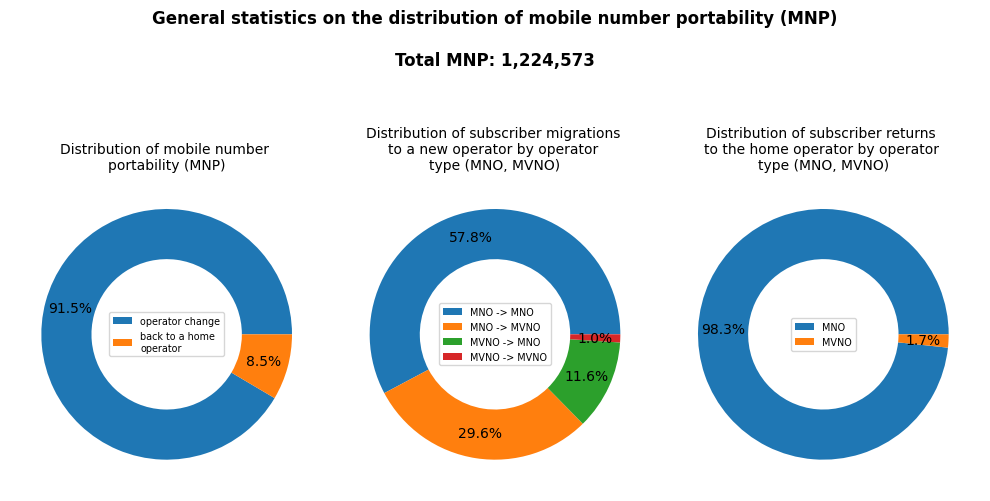

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (10,6))
#fig.suptitle(f'General statistics on the distribution of mobile number portability (MNP)\n\nTotal MNP: {f"{len(data):,}"}'
fig.suptitle(f'General statistics on the distribution of mobile number portability (MNP)\n\nTotal MNP: {f"{len(data):,}"}'
             , fontweight ="bold", fontsize='large')

# Распределение переносов и возвратов
ax[0].pie([len(data[data.goback==False]), len(data[data.goback==True])],
          autopct='%.1f%%', pctdistance=0.8, wedgeprops=dict(width=.4))
ax[0].set_title('Distribution of mobile number \nportability (MNP)', fontdict={'fontsize': 10, 'fontweight': 'normal'})
ax[0].legend(labels=['operator change', 'back to a home \noperator'], loc="center", fontsize='x-small')
# Количество переносов: MNO-MNO, MNO-MVNО, MVNO-MNO, MVNO-MVNO
df = data[data.goback == False]
ax[1].pie([len(df[(df.type_h == 'mno') & (df.type == 'mno')]), len(df[(df.type_h == 'mno') & (df.type != 'mno')]),
           len(df[(df.type_h != 'mno') & (df.type == 'mno')]), len(df[(df.type_h != 'mno') & (df.type != 'mno')])],
          autopct='%.1f%%', pctdistance=0.8, wedgeprops=dict(width=.4))
ax[1].set_title('Distribution of subscriber migrations \nto a new operator by operator \ntype (MNO, MVNO)', fontdict={'fontsize': 10, 'fontweight': 'normal'})
ax[1].legend(labels=['MNO -> MNO', 'MNO -> MVNO', 'MVNO -> MNO', 'MVNO -> MVNO'], loc="center", fontsize='x-small')

# Количество возвратов: MNO, MVNO
df = data[data.goback == True]
ax[2].pie([len(df[(df.type_h == 'mno')]), len(df[(df.type_h != 'mno')])],
          autopct='%.1f%%', pctdistance=0.8, wedgeprops=dict(width=.4))
ax[2].set_title('Distribution of subscriber returns \nto the home operator by operator \ntype (MNO, MVNO)', fontdict={'fontsize': 10, 'fontweight': 'normal'})
ax[2].legend(labels=['MNO', 'MVNO'], loc="center", fontsize='x-small')

fig.tight_layout()
plt.show()

На средней диаграмме видно, что каждый **3-ий абонент**, который переходит от классического оператора (MNO), выбирает виртуального оператора (MVNO).<br>
За исследуемый период виртуальные операторы получили почти 20% абонентов от общего числа MNP за счет переноса номеров от классических операторов.
**Это однозначно демонстрирует популярность виртуальных операторов у российских пользователей сотовой связи.**

Рассмотрим детальную информацию о суммарном количестве MNP на каждый день исследуемого периода:

In [22]:
df = data.groupby(['date'], as_index=False)[['mnc']].count().rename(columns={'mnc' : 'counts'})
df.counts.describe()

count      174.000000
mean      7037.775862
std       3011.778468
min       2961.000000
25%       5818.500000
50%       6602.500000
75%       7199.750000
max      35961.000000
Name: counts, dtype: float64

Видно, что суммарное количество переносов на каждый день исследуемого периода имеет большой разброс, который возможно связан с *выбросами* в данных временного ряда.<br><br> Для визуального анализа, используя метод **regplot** из модуля **seaborn**, построим диаграмму рассеивания *(scatter)* и линейную регрессию. Чтобы уменьшить вес выбросов применим параметр `robust=True`.<br> Для улучшения визуализации данных будем использовать логарифмическую шкалу по оси Y.


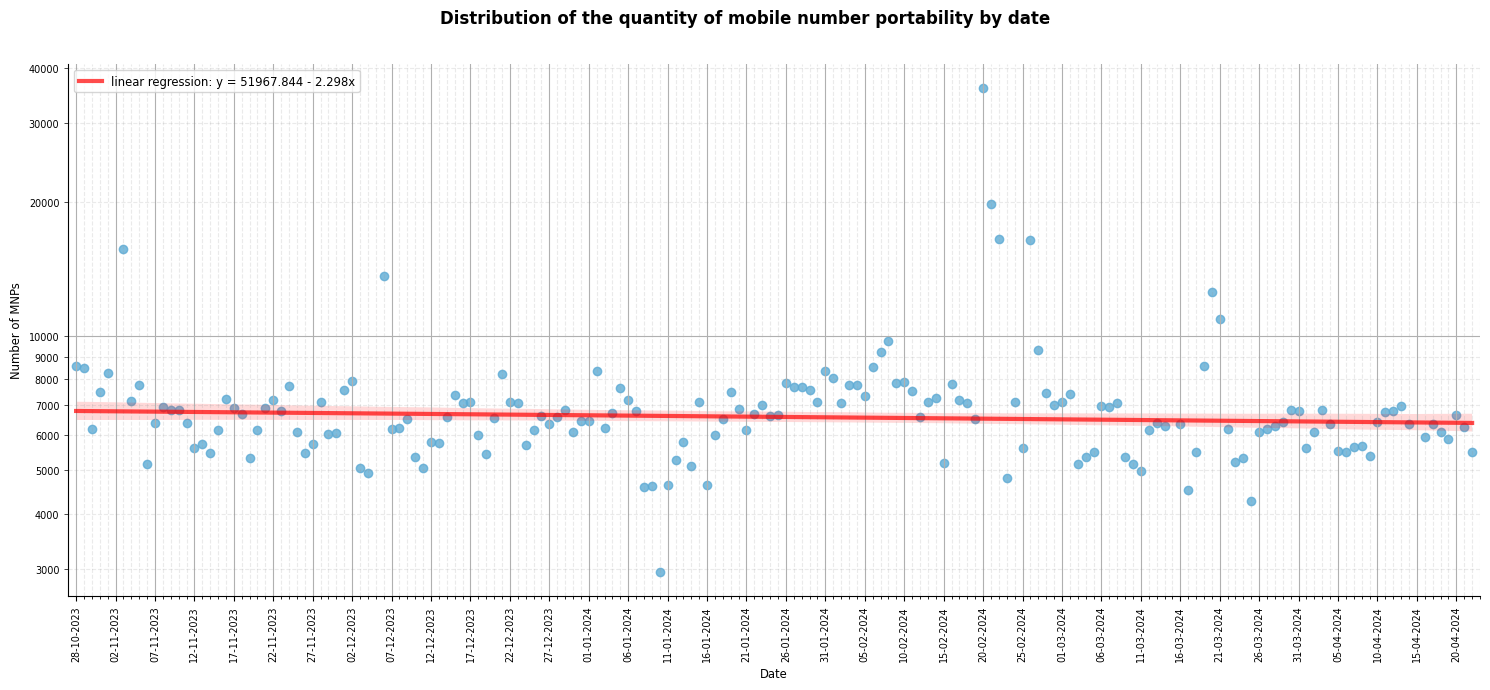

In [ ]:
fig, ax = plt.subplots(figsize = (15,7))
fig.suptitle('Distribution of the quantity of mobile number portability by date\n', fontweight ="bold", fontsize='large')

df = data.groupby(['date'], as_index=False)[['mnc']].count().rename(columns={'mnc' : 'counts'})
# Выполним преобразование временного ряда в целочисленный формат
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].map(dts.date2num)

ax = sns.regplot(x='date', y='counts', data=df, robust=True, scatter_kws=dict(color='#5DABD5'),
                 line_kws=dict(alpha=0.7, color='red', linewidth=3))

ax.set_yscale('log')
ax.grid(True)
ax.minorticks_on()

ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.2)

ax.set_xlim([min(df['date']) - 1, max(df['date']) + 1])
ax.set_xticks(np.arange(min(df['date']), max(df['date']), 5))
ax.tick_params(axis='x', labelsize='x-small', rotation=90)

ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%d"))
ax.yaxis.set_minor_formatter(mpl.ticker.FormatStrFormatter("%d"))
ax.tick_params(axis='y', which='both', width=0.5, length=3, labelsize='x-small')

date_format = dts.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('Date', fontdict={'fontsize': 'small', 'fontweight': 'normal'})
ax.set_ylabel('Number of MNPs', fontdict={'fontsize': 'small', 'fontweight': 'normal'})
ax.spines[['right', 'top']].set_visible(False)

bx = ax
slope, intercept, r, bx, sterr = scipy.stats.linregress(x=bx.get_lines()[0].get_xdata(),
                                                        y=bx.get_lines()[0].get_ydata())
if slope > 0: st = 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x'
else : st = 'y = ' + str(round(intercept,3)) + ' - ' + str(abs(round(slope,3))) + 'x'

ax.legend(handles=plt.gca().lines, labels=[f'linear regression: {st}'], loc='upper left', fontsize='small')

fig.tight_layout()
plt.show()

На построенном графике видно, что функция регрессии имеет отрицательный наклон. Из этого мы можем сделать вывод, что за исследуемых период число переносов постепенно снижалось.

<hr size="3" color="black" />

**ИССЛЕДОВАНИЕ MNP.** Исследование влияние MNP на изменение абонентских баз мобильных операторов.

Построим для каждого оператора мобильной связи распределение по оттоку и притоку абонентов за исследуемый временной период.<br>
Для улучшения визуализации будем использовать логарифмическую шкалу для оси X.

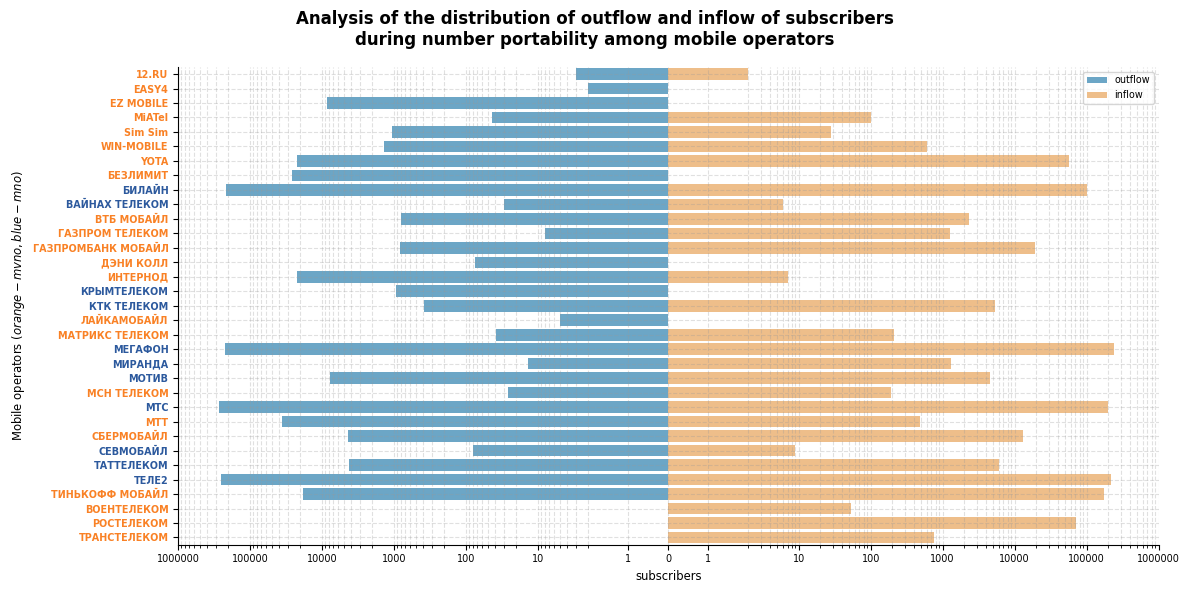

In [23]:
# Создадим class для отображения minor ticks на оси symlog
# При его создании использовались материалы с сайта:
# https://stackforgeeks.com/blog/customizing-yaxis-major-ticks-on-symlog-scale
class MinorSymLogLocator(Locator):
    def __init__(self, linthresh):
        self.linthresh = linthresh
    def __call__(self):
        majorlocs = self.axis.get_majorticklocs()
        minorlocs = []
        for i in range(1, len(majorlocs)):
            majorstep = majorlocs[i] - majorlocs[i-1]
            if majorstep != 1: # мои изменения в код
              if abs(majorlocs[i-1] + majorstep/2) < self.linthresh:
                  ndivs = 10
              else:
                  ndivs = 9
              minorstep = majorstep / ndivs
              locs = np.arange(majorlocs[i-1], majorlocs[i], minorstep)[1:]
              minorlocs.extend(locs)
        return self.raise_if_exceeds(np.array(minorlocs))

fig, ax = plt.subplots(figsize = (12,6))
fig.suptitle('Analysis of the distribution of outflow and inflow of subscribers\nduring number portability among mobile operators',
             fontweight ="bold", fontsize='large')
order = ['outflow', 'inflow']
colors = ['#5DABD5', '#FFBE79']
method_col = [['brend_h', 'type_h', 'mnc'], ['brend', 'type', 'mnc_h']]
multiplier = [-1, 1]
label = []

for i in range(len(order)):
    df = data[data.goback == False].groupby([method_col[i][0], method_col[i][1]])[method_col[i][2]].count().reset_index(name = 'counts')
    label += df[[method_col[i][0], method_col[i][1]]].values.tolist()
    df['counts'] = df['counts'].apply(lambda x: x*multiplier[i])
    ax = sns.barplot(x='counts', y=method_col[i][0], data=df, color=colors[i], label=order[i])

label= {i.pop(0): i.pop(0) for i in label}
for i in ax.yaxis.get_ticklabels():
    i.set_color('#2C599D' if 'mno' in label[i.get_text()] else '#F98125')
    i.set_fontweight('bold')

ax.set_xscale('symlog')
ax.axes.set_xlim(-1e6, 1e6)
ax.tick_params(axis='both', labelsize='x-small')
ax.set_xlabel('subscribers', fontdict={'fontsize': 'small', 'fontweight': 'normal'})
ax.set_ylabel(f'Mobile operators {r"$(orange - mvno, blue - mno)$"}', fontdict={'fontsize': 'small', 'fontweight': 'normal'})
ax.grid(True, which='both', color='#999999', linestyle='--', alpha=0.3)
ax.legend(loc='best', fontsize='x-small')
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
ax.xaxis.set_minor_locator(MinorSymLogLocator(1e-6))
ax.set_xticks(ax.get_xticks().tolist()[:])
labels_x = [re.sub('[^0-9]', '', item.get_text()) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels_x)

fig.tight_layout()
plt.show()

На графике видно:


1.   лидерами по оттоку `outflow` абонентов (> 100,000) являются классические мобильные операторы большой четверки: **Билайн**, **Мегафон**, **МТС** и **ТЕЛЕ2**.
2.   список лидеров по притоку `inflow` абонентов (>100,000) изменился по сравнению с предыдущим списком и место **Билайн** занял виртуальный оператор **Тинькофф Мобайл**.
3. интресным фактом является то, что многолетний лидер по размеру абонентской базы среди виртуальных операторов компания **YOTA**, уступает виртуальным операторам **Тинькофф Мобайл** и **Ростелеком**, как по притоку, так и оттоку пользователей.
4. Абсолютным лидером по притоку абонентов среди "банковских" MVNO является **Тинькофф Мобайл**, значительно опережая **СберМобайл**, **Газпромбанк Мобайл** и **ВТБ Мобайл**.

Для демонстрации основных характеристик статистической выборки по оттоку и притоку абонентов для каждого оператора мобильной связи построим диаграмму **"Ящик с усами"** (box and whiskers diagram). <br><br>Для начала построим  гистограмму распределения и ящик с усами для одного мобильного оператора, например: для МТС.

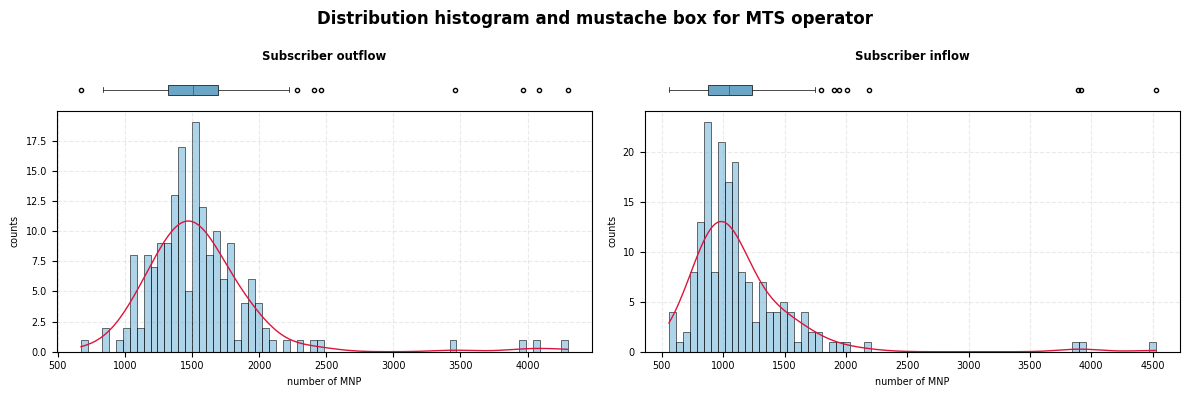

In [24]:
method = ['outflow', 'inflow']
def get_df_boxplot(data, method, min_MNP):
    if method == 'inflow': operand = ['brend', 'date', 'type']
    else: operand = ['brend_h', 'date', 'type_h']
    df = data.loc[data.goback == False, operand].groupby(operand).size().reset_index(name='counts')
    if method == 'outflow': df.rename(columns ={'brend_h':'brend', 'type_h' :'type'}, inplace=True)
    df['type'] = np.where(df['type'] == 'mno', 'mno', 'mvno')
    df = df[df.counts > min_MNP]
    return df

fig, ax = plt.subplots(2, 2, gridspec_kw = {'height_ratios': (.05, .95)}, figsize = (12,4))
fig.suptitle('Distribution histogram and mustache box for MTS operator',
             fontweight ="bold", fontsize='large')
for i in range(len(method)):
  df = get_df_boxplot(data=data, method=method[i], min_MNP=5)
  df = df.loc[df.brend == 'МТС',]
  sns.boxplot(x = df.counts, ax = ax[0, i], medianprops={"color": "r", "linewidth": 0.5},
              linewidth=.5, fliersize=3, color='#5DABD5', linecolor="black")
  sns.histplot(x = df.counts, ax = ax[1, i], bins = 70, kde = True, color='#5DABD5',
               line_kws={'linewidth':1, 'color':'black'})
  ax[1, i].lines[0].set_color('crimson')
  ax[0, i].set(xlabel = '')
  ax[0, i].spines[['right', 'top', 'left','bottom']].set_visible(False)
  ax[0, i].set_xticks([])
  ax[0, i].set_yticks([])
  ax[1, i].tick_params(axis='both', labelsize='x-small')
  ax[1, i].set_xlabel('number of MNP', fontdict={'fontsize': 'x-small', 'fontweight': 'normal'})
  ax[1, i].set_ylabel('counts', fontdict={'fontsize': 'x-small', 'fontweight': 'normal'})
  ax[1, i].grid(True, which='major', color='#999999', linestyle='--', alpha=0.2)
  ax[0, i].set_title(f'Subscriber {method[i]}\n', fontdict={'fontsize': 'small', 'fontweight': 'bold'})

fig.tight_layout()
plt.show()

На графиках мы видим все основные характеристики статистической выборки по оттоку и притоку абонентов МТС, а именно: распределение данных между квартилями, медиану, максимальное и минимальное значения, а также выбросы данных.<br><br>

Аналогичным образом построим **"Ящик с усами"** для всех операторов, у которых количество переносов номеров больше 5. Будем использовать логарифмическую шкалу по оси Y.

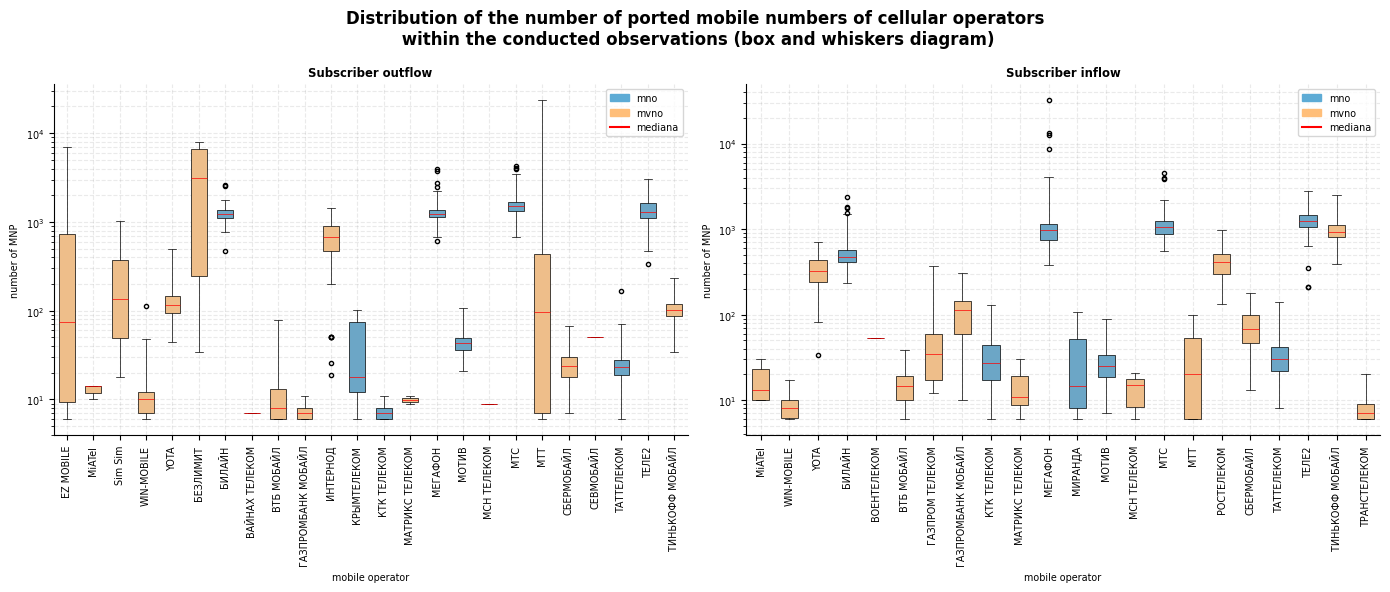

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (14,6))
fig.suptitle('Distribution of the number of ported mobile numbers of cellular operators\n within the conducted observations (box and whiskers diagram)',
             fontweight ="bold", fontsize='large')

mno_legend = mpatches.Patch(color='#5DABD5', label='mno')
mvno_legend = mpatches.Patch(color='#FFBE79', label='mvno')
mediana_legend = Line2D([0], [0], label='mediana', color='red')

for i in range(len(method)):
    df = get_df_boxplot(data=data, method=method[i], min_MNP=5)
    sns.boxplot(x='brend', y='counts', data=df, notch=False, log_scale=True, hue='type',
            medianprops={"color": "r", "linewidth": 0.5}, showcaps=True,
            hue_order=['mno', 'mvno'], width = 0.6, legend=False, dodge=False, ax=ax[i],
            palette={'mno' : '#5DABD5', 'mvno' : '#FFBE79'},
            fill=True, linecolor="black", linewidth=.5, fliersize=3, whis=3)

    ax[i].grid(True, which='both', color='#999999', linestyle='--', alpha=0.2)
    ax[i].tick_params(axis='x', labelsize='x-small', rotation=90)
    ax[i].tick_params(axis='y', labelsize='x-small')
    ax[i].legend(handles=[mno_legend, mvno_legend, mediana_legend], loc='upper right', fontsize='x-small')
    ax[i].set_xlabel('mobile operator', fontdict={'fontsize': 'x-small', 'fontweight': 'normal'})
    ax[i].set_ylabel('number of MNP', fontdict={'fontsize': 'x-small', 'fontweight': 'normal'})
    ax[i].set_title(f'Subscriber {method[i]}', fontdict={'fontsize': 'small', 'fontweight': 'bold'})
    ax[i].spines[['right', 'top']].set_visible(False)

fig.tight_layout()
plt.show()

Сделаем анализ полученных графиков:

**Subscriber outflow:**

*   отток пользователей от MVNO имеет намного больший разброс, в отличие от     оттока пользователей от MNO;
*   как уже было отмечено ранее в исследовании, наибольший отток пользователей за рассматриваемый временной период произошел от мобильных операторов большой четверки (Билайн, МТС, Мегафон, Теле2), что подтверждает наша диаграмма.

**Subscriber inflow:**
*   виртуальные мобильные операторы набирают всю большую популярность при переносе мобильного номера и не уступают многим классическим операторам;
*   MVNO Тинькофф Мобайл и вовсе догоняет операторов большой четверки.



Перейдем к подробному рассмотрению оттока и притока абонентов у операторов мобильной связи, связанных с MNP. Для этого напишем универсальную функцию `diagrams_inflow_outflow(direction)`, где `direction=['outflow', 'inflow']` определяет направление переходов абонентов.<br>При исследовании будем рассматривать **ТОП-5 операторов** для каждого направления.

In [26]:
def diagrams_inflow_outflow(direction):
    if direction not in ['inflow', 'outflow']:
        print('Error function "diagrams_inflow_outflow(direction)".\nThe "direction" parameter must be "inflow" or "outflow".')
        exit()
    if direction == 'inflow':
        title = 'Analysis of data on subscriber inflow to operators\n'
        title0 = 'Top 5 operators by number of subscribers\nmigrated from other operators'
        p1, p2, p3, p4, p5, p6 = 'brend', 'type', 'mnc', 'brend_h', 'type_h', 'mnc_h'
    else:
        title = 'Analysis of data on subscriber outflow from operators\n'
        title0 = 'Top 5 operators by number of subscribers\nwho migrated to other operators'
        p1, p2, p3, p4, p5, p6 = 'brend_h', 'type_h', 'mnc_h', 'brend', 'type', 'mnc'

    fig_row, fig_col = 2, 3

    fig, ax = plt.subplots(nrows = fig_row, ncols = fig_col, figsize = (15,7))
    fig.suptitle(title, fontweight ="bold", fontsize='large')

    df = data[data.goback == False].groupby([p1, p2])[[p3]].count().sort_values(by=p3, ascending=False)[:5]
    df.reset_index(inplace=True)
    df['label'] = df.apply(lambda row: row[p1] if row[p2] == 'mno' else f'{row[p1]} (mvno)', axis=1)
    df.loc[len(df.index)] = ['Другие', '', len(data[data.goback == False]) - df[p3].sum(), 'Другие']
    ax[0, 0].pie(df[p3], autopct='%.1f%%', pctdistance=1.2, wedgeprops=dict(width=.4), textprops={'fontsize': 'x-small', 'fontweight': 'bold'})
    ax[0, 0].set_title(title0, fontdict={'fontsize': 'small', 'fontweight': 'bold'})
    ax[0, 0].legend(labels=df.label, loc="center", fontsize='xx-small')

    df, i, k = df[:5], 0, 1
    mno_color, mvno_color = '#b8def5', '#fcd9ae'
    for index, row in df.iterrows():
        h_bar = 0.8
        da = data[(data.goback == False) & (data[p1] == row[p1]) & (data[p4] !=
                        row[p1])].groupby([p4, p5])[[p6]].count().sort_values(by=
                        p6, ascending=False).sort_values(by=p6, ascending=False)[:10].sort_values(by=p6, ascending=True)
        da.reset_index(inplace=True)
        max_labels = max(da[p6])
        list_labels = [list(i) for i in zip(da[p6], da[p5])]
        mvno_labels = [p[0] if ((p[0] < (max_labels * 1 / 100)) and (p[1] != 'mno')) else '' for p in list_labels]
        mno_labels = [p[0] if ((p[0] < (max_labels * 1 / 100)) and (p[1] == 'mno')) else '' for p in list_labels]
        da['colours'] = da[p5].apply(lambda x: mno_color if x == 'mno' else mvno_color)
        if len(da) < 10: h_bar = (h_bar / 10) * len(da)
        bars = ax[i, k].barh(da[p4], da[p6], align='center', height=h_bar, color=da.colours)
        ax[i, k].spines[['right', 'top', 'bottom']].set_visible(False)
        ax[i, k].tick_params(axis='x', labelsize='x-small')
        ax[i, k].tick_params(axis='y', labelsize='x-small')
        ax[i, k].grid(True, which='major', color='#999999', linestyle='--', alpha=0.2)
        ax[i, k].set_xlabel('subscribers', fontdict={'fontsize': 'xx-small', 'fontweight': 'normal'})
        if direction == 'inflow':
            ax[i, k].set_title(f'Subscribers transferred to {row[p1]} from\nother operators (Top 10)',
                               fontdict={'fontsize': 'x-small', 'fontweight': 'bold'})
        else:
            ax[i, k].set_title(f'Transfer of {row[p1]} subscribers\nto other operators (Top 10)',
                               fontdict={'fontsize': 'x-small', 'fontweight': 'bold'})
        ax[i, k].bar_label(bars, mno_labels, padding=5, color='#1f77b4', fontsize='xx-small', label_type='edge', fontweight='bold')
        ax[i, k].bar_label(bars, mvno_labels, padding=5, color='orange', fontsize='xx-small', label_type='edge', fontweight='bold')

        mno_legend = mpatches.Patch(color='#b8def5', label='mno')
        mvno_legend = mpatches.Patch(color='#fcd9ae', label='mvno')
        ax[i, k].legend(handles=[mno_legend, mvno_legend], loc='lower right', fontsize='x-small')

        if (k + 1) > fig_col - 1: i, k = i + 1, 0
        else: k += 1

    fig.tight_layout()
    plt.show()
    return

Выполним функцию `diagrams_inflow_outflow(direction)` для определения ТОП-5 операторов по оттоку пользователей и подробно для каждого из этих операторов рассмотрим ТОП-10 компаний сотовой связи, к которым переходили их абоненты.

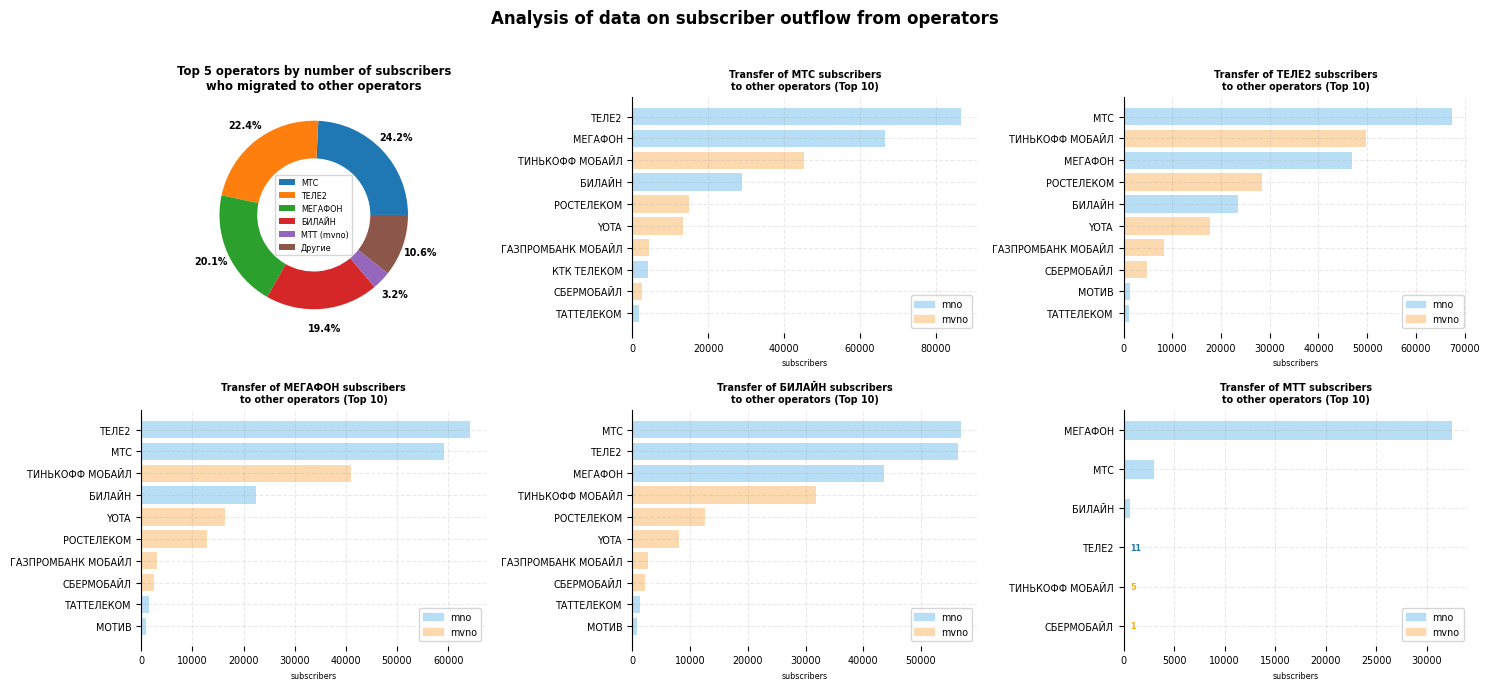

In [27]:
diagrams_inflow_outflow('outflow')

В ТОП-5 вошла вся большая четверка сотовых операторов (Билайн, МЕГАФОН, МТС, ТЕЛЕ2) и виртуальный оператор МТТ (Межрегиональный транзит телеком).

Мы видим, что значительная часть абонентов переходила от классических операторов большой четвертки к виртуальным операторам: Тинькофф Мобайл, Ростелеком и Yota, что позволяет сделать предположение о популярности и востребованности услуг этих компаний у российских пользователей мобильной связи в России.

Построим аналогичные графики для определения ТОП-5 операторов по притоку пользователей и подробно для каждого из этих операторов рассмотрим ТОП-10 компаний сотовой связи от которых переходили к ним абоненты.

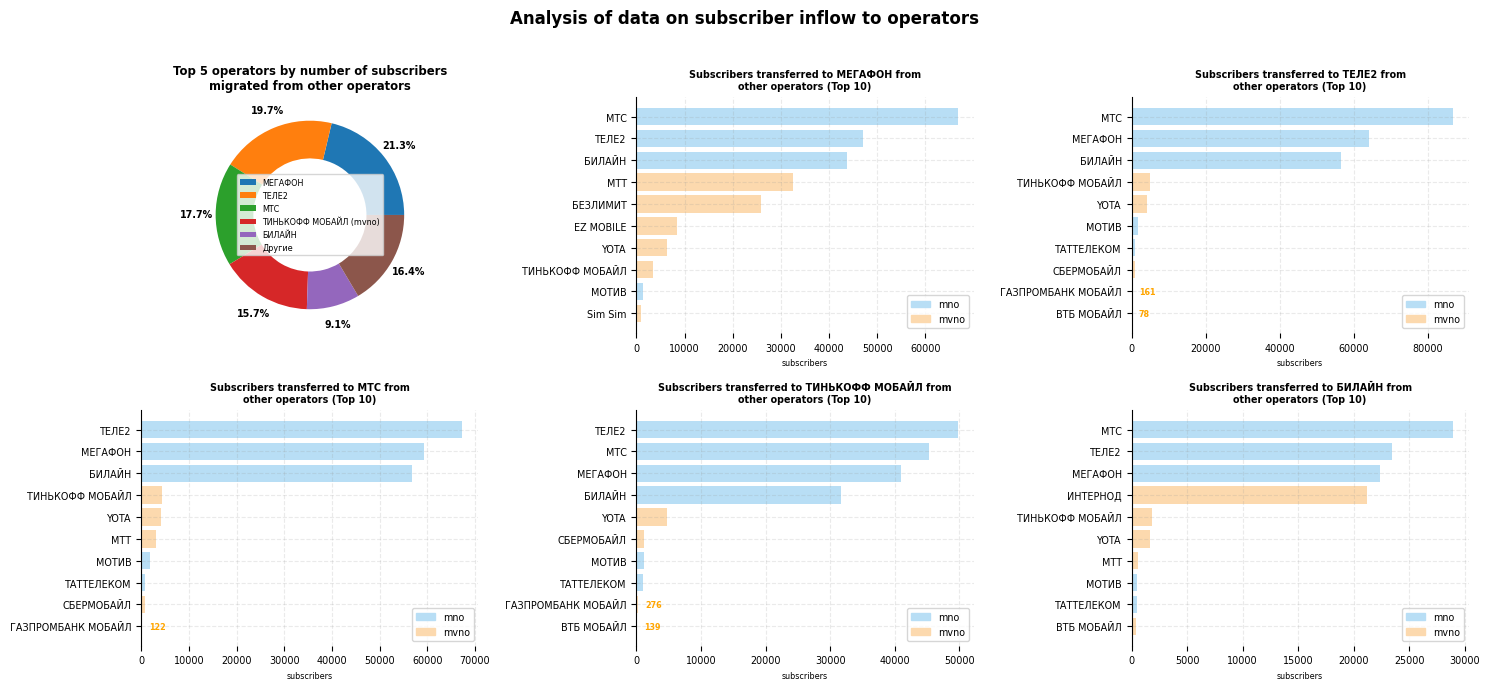

In [28]:
diagrams_inflow_outflow('inflow')

В ТОП-5 вошла вся большая четверка сотовых операторов (Билайн, МЕГАФОН, МТС, ТЕЛЕ2) и виртуальный оператор Тинькофф Мобайл, причем последний обогнал по притоку абонентов компанию Билайн.

Удивителен тот факт, что приток пользователей к виртуальному оператору Тинькофф Мобайл, также как и к операторам MNO, происходит за счет перехода абонентов от классических операторов сотовой связи. Это позволяет утверждать, что по стоимости и качеству предоставляемых услуг, компания Тинькофф Мобайл способна на равных конкурировать с операторами большой четвертки.


Рассмотрим, какое количество абонентов вернулось (сделали обратный перенос своего номера к оператору, изначально владеющему этим номером).

**Примечание:** в наших данных содержится информация о возвратах телефонных номеров, перенос по которым был осуществлен не только внутри временного интервала нашего исследования, но и в более ранние периоды.

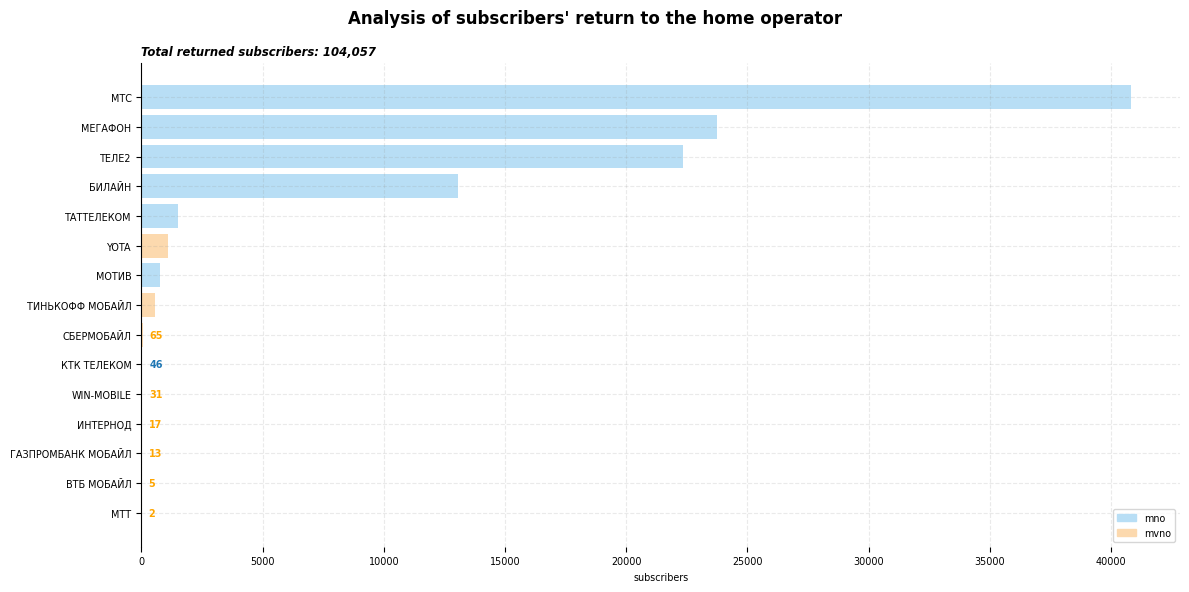

In [29]:
fig, ax = plt.subplots(figsize = (12, 6))

fig.suptitle('Analysis of subscribers\' return to the home operator', fontweight ="bold", fontsize='large')
mno_color, mvno_color = '#b8def5', '#fcd9ae'

df = data[data.goback == True]
df = df.groupby(['brend_h', 'type_h'])[['mnc_h']].count().sort_values(by='mnc_h', ascending=True)
df.reset_index(inplace=True)
plt.title(f'Total returned subscribers: {f"{sum(df.mnc_h):,}"}', loc='left', fontdict={'fontsize':'small', 'fontweight':'bold', 'fontstyle': 'oblique'})

max_labels = max(df.mnc_h)
list_labels = [list(i) for i in zip(df.mnc_h, df.type_h)]
mvno_labels = [p[0] if ((p[0] < (max_labels * 1 / 100)) and (p[1] != 'mno')) else '' for p in list_labels]
mno_labels = [p[0] if ((p[0] < (max_labels * 1 / 100)) and (p[1] == 'mno')) else '' for p in list_labels]


df['colours'] = df['type_h'].apply(lambda x: mno_color if x == 'mno' else mvno_color)

bars = ax.barh(df.brend_h, df.mnc_h, align='center', height=0.8, color=df['colours'])
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.tick_params(axis='x', labelsize='x-small')
ax.tick_params(axis='y', labelsize='x-small')
ax.grid(True, which='major', color='#999999', linestyle='--', alpha=0.2)
ax.set_xlabel('subscribers', fontdict={'fontsize': 'x-small', 'fontweight': 'normal'})

ax.bar_label(bars, mno_labels, padding=5, color='#1f77b4', fontsize='x-small', label_type='edge', fontweight='bold')
ax.bar_label(bars, mvno_labels, padding=5, color='orange', fontsize='x-small', label_type='edge', fontweight='bold')

mno_legend = mpatches.Patch(color='#b8def5', label='mno')
mvno_legend = mpatches.Patch(color='#fcd9ae', label='mvno')
ax.legend(handles=[mno_legend, mvno_legend], loc='lower right', fontsize='x-small')

fig.tight_layout()
plt.show()

Интересно посмотреть, как повлияли различные MNP, включающие в себя приток, отток и возврат пользователей на изменения абонетских баз операторов мобильной связи. Для большей наглядности рассмотрим ТОП-7 операторов, у которых произошло увеличение абонентских баз, и ТОП-7 операторов, у которых они уменьшились.

Для визуализации построим **сложную диаграмму**, которая будет наглядно это демонстрировать.  

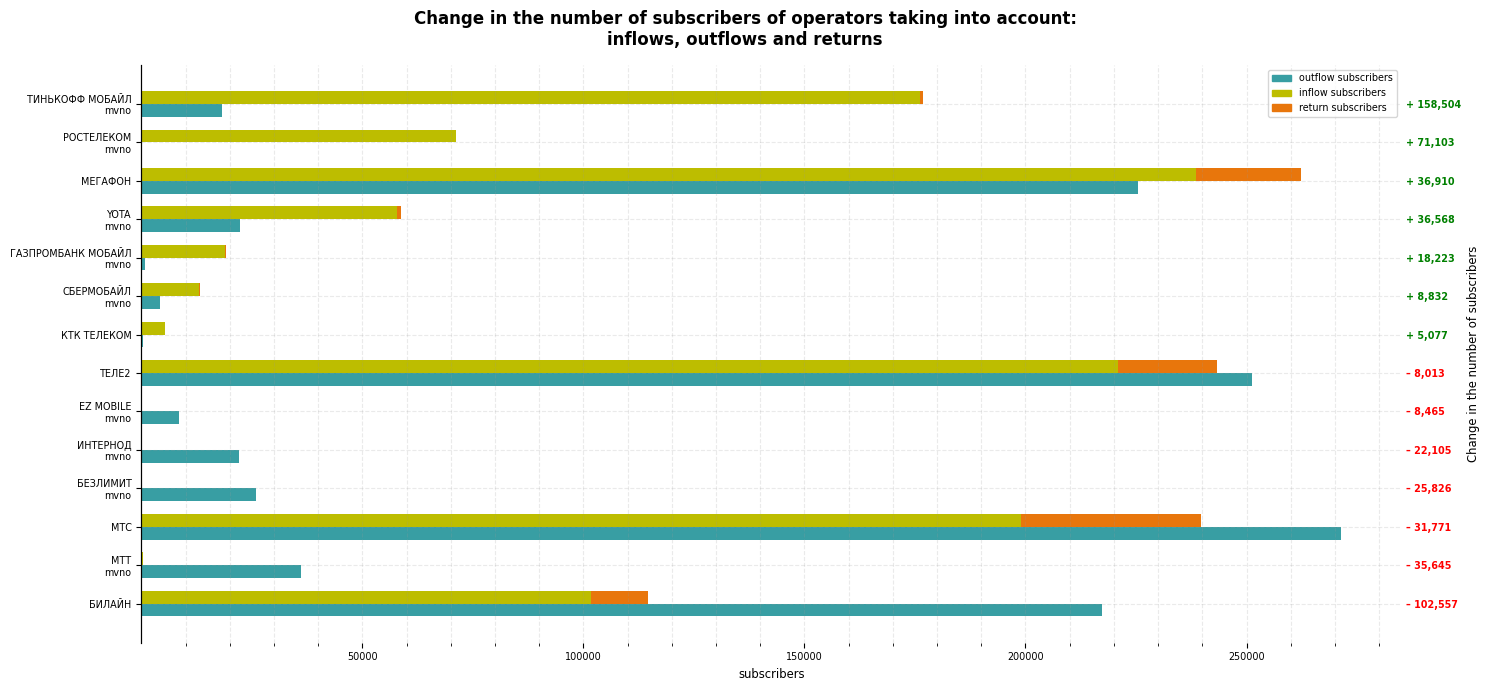

In [30]:
fig, ax = plt.subplots(figsize = (15,7))
fig.suptitle('Change in the number of subscribers of operators taking into account:\ninflows, outflows and returns', fontweight ="bold", fontsize='large')

# inflow
da = data[data.goback == False].groupby(['brend', 'type'])[['mnc']].count().sort_values(by='mnc', ascending=False)
da.reset_index(inplace=True, drop=False)
da.rename(columns={'mnc' : 'inflow'}, inplace = True)

# outflow
db = data[data.goback == False].groupby(['brend_h', 'type_h'])[['mnc_h']].count().sort_values(by='mnc_h', ascending=False)
db.reset_index(inplace=True, drop=False)
db.rename(columns={'brend_h' : 'brend', 'type_h' : 'type', 'mnc_h' : 'outflow'}, inplace = True)

# return
dc = data[data.goback == True].groupby(['brend_h', 'type_h'])[['mnc_h']].count().sort_values(by='mnc_h', ascending=False)
dc.reset_index(inplace=True, drop=False)
dc.rename(columns={'brend_h' : 'brend', 'type_h' : 'type', 'mnc_h' : 'goback'}, inplace = True)

df = pd.merge(da, db, on='brend', how='outer')
df = pd.merge(df, dc, on='brend', how='outer')
df = df.fillna(0)

def get_type2(a, b, c):
    return c if c != 0 else b if b != 0 else a

df.type = df.apply(lambda x: get_type2(x.type_x, x.type_y, x.type), axis=1)
df.drop(['type_x', 'type_y'], axis=1, inplace=True)
df[['inflow', 'outflow', 'goback']] = df[['inflow', 'outflow', 'goback']].astype('int64')
df['brend'] = np.where(df['type'] != 'mno', df['brend'] +'\nmvno', df['brend'])
df = df.iloc[:, [0, 3, 1, 2, 4]]
df['inflow_goback'] = df['inflow'] + df['goback']
df['result'] = df['inflow_goback'] - df['outflow']
df.sort_values(by='result', ascending=False, inplace=True)
df = pd.concat([df.iloc[:7], df.iloc[-7:]], axis=0)
df.sort_values(by='result', inplace=True)

df_data = list(zip(df['outflow'], df['inflow_goback'], df['inflow']))
label_change = list(df.result)
label_operator = list(df.brend)

for i in range(len(label_change)):
    label_change[i] = f'+ {f"{label_change[i]:,}"}' if label_change[i] >= 0 else f'– {f"{abs(label_change[i]):,}"}'

dim = len(df_data[0])
width = 1.0
dimw = width / dim

x = np.arange(len(df_data))
colors = ['#389EA3', '#E8760C', '#BDBD00']

for i in range(len(df_data[0])):
    y = [d[i] for d in df_data]
    if i < 2: k = x + i * dimw
    bars = ax.barh(k, y, dimw, left = 0.001, color=colors[i])

ax.set_yticks(x + dimw / 2)
ax.set_yticklabels(label_operator)
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(x + dimw / 2)

ax2.set_yticklabels(list(df.result))
for i in ax2.yaxis.get_ticklabels():
    i.set_color('red' if int(i.get_text()) < 0 else 'green')
    i.set_fontweight('bold')
ax2.set_yticklabels(label_change)

ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax2.spines[['right', 'top', 'bottom']].set_visible(False)

ax.tick_params(axis='x', labelsize='x-small', )
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='y', labelsize='x-small')
ax2.tick_params(axis='y', labelsize='x-small', length=0)
ax.grid(True, which='both', color='#999999', linestyle='--', alpha=0.2)
ax.set_xlabel('subscribers', fontdict={'fontsize': 'small', 'fontweight': 'normal'})
ax2.set_ylabel('Change in the number of subscribers', fontdict={'fontsize': 'small', 'fontweight': 'normal'})

legend_outflow = mpatches.Patch(color=colors[0], label='outflow subscribers')
legend_inflow = mpatches.Patch(color=colors[2], label='inflow subscribers')
legend_return = mpatches.Patch(color=colors[1], label='return subscribers')
ax.legend(handles=[legend_outflow, legend_inflow, legend_return], loc='best', fontsize='x-small')

fig.tight_layout()
plt.show()

**АБСОЛЮТНЫМ ЛИДЕРОМ** по увеличению абонентской базы, связанной с переносами мобильных номеров, является **ВИРТУАЛЬНЫЙ** оператор **Тинькофф Мобайл**. Кроме того, в ТОП-7 входят **5** виртульных операторов. С большим отставанием от Тинькофф Мобайл и Ростелеком в тройку лидеров вошел только один оператор из большой четверки - компания Мегафон.

**АБСОЛЮТНЫМ АУТСАЙДЕРОМ**, потерявшим больше всего абонентов, стал оператор мобильной связи **Билайн**. Компании ТЕЛЕ2 и МТС также потеряли абонентов, которые вместо них выбирали других операторов!

На мой взгляд это удивительный результат!

<hr size="3" color="black" />

**ИССЛЕДОВАНИЕ MNP.** Исследование использования абонентами услуги MNP на территории Российской Федерации. Работа с геоданными.

Для визуальной демонстрации географии использования абонентами услуги MNP на территории РФ напишем функцию `drawing_map_russia(view)`, где `view = ['all', 'capita']`. `'all'` - простой вывод географии использования по регионам РФ, а `'capita'` - вывод на душу населения.<br>
В качестве геоданных будем использовать ранее созданный мной файл `map_russia.json`.


In [31]:
def drawing_map_russia(view):
  df = data.groupby(['id_region'])[['mnc']].count()

  file_geo = 'map_russia.json' # GEO file
  gdf = gpd.read_file(dir_geo + file_geo)
  gdf = gdf.sort_values(by='id_region')
  gdf.reset_index(inplace=True, drop=True)

  gdf2 = gdf.copy()
  gdf2 = pd.merge(gdf2, df, on='id_region', how='outer')
  gdf2 = gdf2.dropna()
  if view == 'all':
    title_fig='Subscribers\' activity in using MNP in Russian regions'
    legend_pos='upper right'
    gdf2 = gdf2.astype({'mnc': int})
  else:
    title_fig='Subscriber activity in MNP use in Russian regions per capita'
    gdf2['mnc'] = gdf2.mnc / (gdf2.population)
    legend_pos='upper left'

  crs = 'EPSG:32646'
  gdf = gdf.to_crs(crs)
  gdf2 = gdf2.to_crs(crs)

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
  fig.suptitle(title_fig, fontweight ="bold", fontsize='large')

  divider = make_axes_locatable(ax[0])

  cmap = 'turbo'

  cax = divider.append_axes("right", size="3%", pad=0.05)
  base = gdf.plot(color='#DCDCDC', ax=ax[0], linewidth=0.2, edgecolor='white')

  gdf2.plot(column='mnc', cmap=cmap, legend=True, ax=base, cax=cax, vmax=gdf2.mnc.max(), vmin=gdf2.mnc.min())
  ax[0].set_axis_off()
  ax[0].figure.axes[2].tick_params(labelsize='xx-small')
  ax[0].figure.axes[2].set_ylabel('Amount of numbers transferred', fontsize='x-small')

  gdf2.sort_values(by='mnc', inplace=True, ascending=False)
  gdf2 = gdf2[:10]
  gdf2.reset_index(inplace=True)

  color_list = ['#FF0000', '#00008B', '#8CCB5E', '#9966CC', '#808000', '#660066', '#AFDAFC', 'orange', '#FC89AC', '#FFFF00']

  base = gdf.plot(color='white', ax=ax[1], linewidth=0.1, edgecolor='black')
  gdf2.plot(color=color_list, legend=True, ax=base, categorical=False)

  ax[1].set_axis_off()
  legend = []
  for i in range(10):
      legend.append(mpatches.Patch(color=color_list[i], label='%-25s %s' % (gdf2.loc[i, "region"], f'{round(gdf2.loc[i, "mnc"], 3):>7,}')))
  ax[1].legend(handles=legend, loc=legend_pos, title=r'$\bf{TOP \ 10 \ regions}$', title_fontsize='x-small',
              prop=mpl.font_manager.FontProperties(family='monospace', size=6.5))

  fig.tight_layout()
  plt.show()
  return

Выведем на карту России активность абонентов использования услуги MNP в регионах РФ.

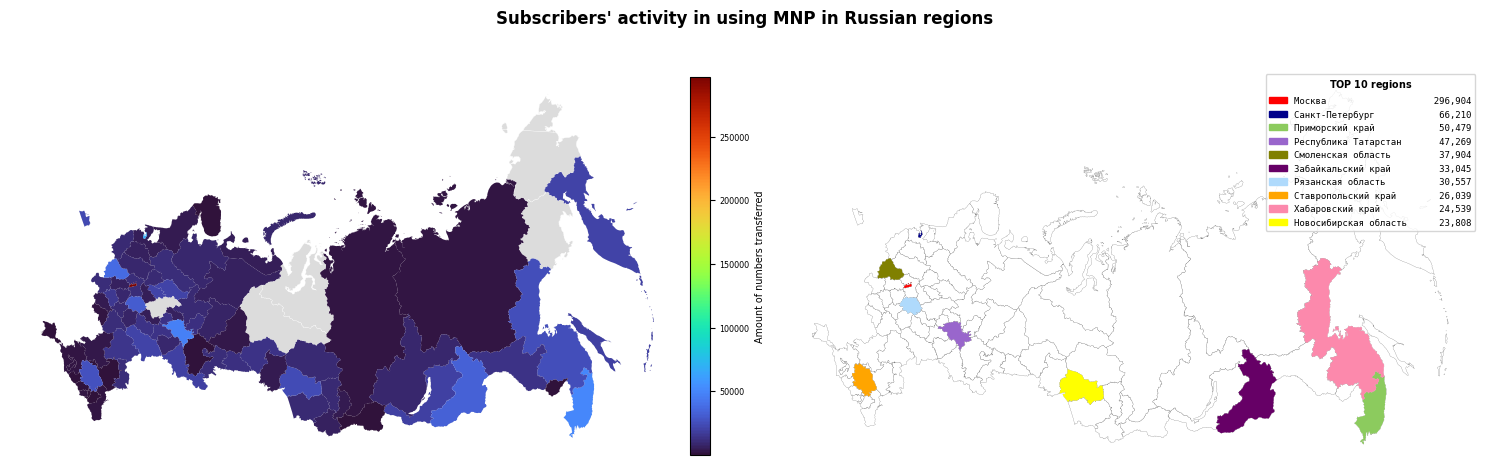

In [ ]:
drawing_map_russia('all')

На карте видно, что за исследуемый временной период абоненты мобильных операторов активно пользовались услугой MNP практически на всей территории России, включая КРЫМ и Луганскую Народную Республику. Исключения составили только: Магаданская область, Нижегородская область, Чукотский автономный округ, Ханты-Мансийский автономный округ и Ямало-Ненецкий автономном округ (на карте выделено сером цветом).

В тройку лидеров по количеству использования услуги MNP вошли: Москва, Санкт-Петербург и Приморский край.

Теперь посмотрим активность абонентов использования услуги MNP в регионах РФ в пересчете на душу населения.

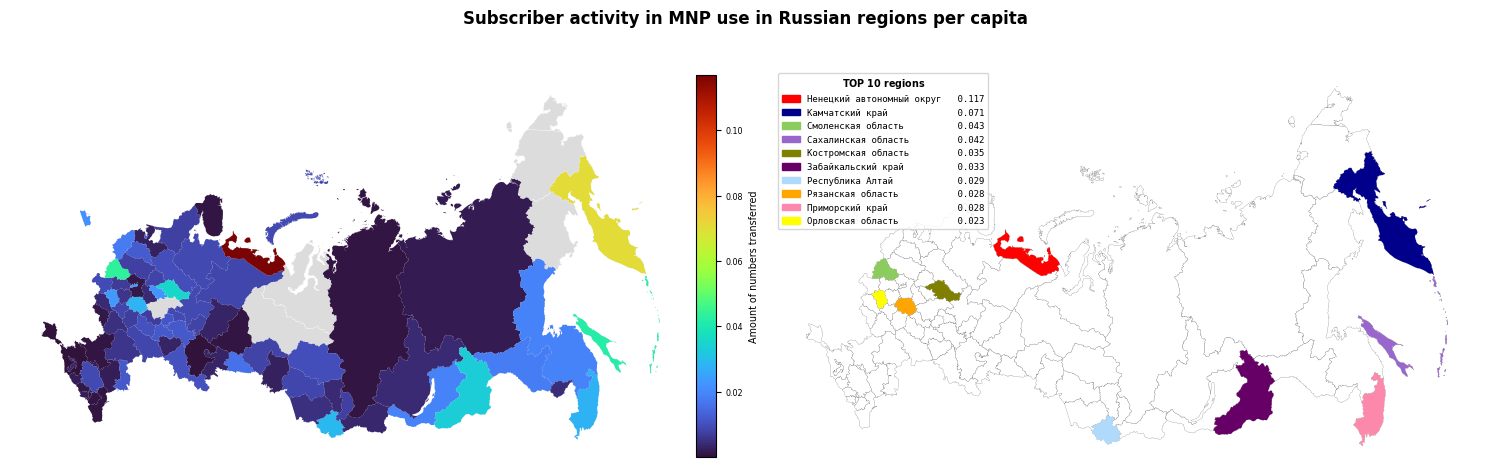

In [32]:
drawing_map_russia('capita')

В пересчете на душу населения тройка лидеров регионов по количеству использования услуги MNP существенно изменилась, в нее вошли: Ненецкий автономный округ, Камчатский край и Смоленская область.

Создадим с помощью `ipywidgets` **ИНТЕРАКТИВНУЮ карту** России для более гибкой демонстрации использования абонентами услуги MNP.<br>
Для этого на базе функции `drawing_map_russia(view)` напишем функцию `drawing_map_interractive(gdf, type_mnp, type_oper, oper)`, где:


*   gdf - dataframe c геоданными для карты России;
*   type_mnp - тип MNP (перенос или возврат номера);
*   type_oper - тип оператора (MNO или MVNO);
*   oper - мобильный оператор.



In [33]:
def drawing_map_interractive(gdf, type_mnp, type_oper, oper):
  st1, st2 = '', ''
  if type_mnp == 'Перенос номеров к оператору': st1 = 'goback==False'
  elif type_mnp == 'Возврат номеров к домашнему оператору': st1 = 'goback==True'
  if type_oper != 'Все':
    title=f'Distribution of subscribers who migrated to {oper}'
    if oper != ' ': st2 = f'brend == "{oper}"'
  else: title='Distribution of subscribers by MNP usage for all operators'
  st = st1 + (' and ' if (st1!='') and (st2!='') else '') +st2
  if st !='': df=data.query(st)
  else: df=data.copy()

  df = df.groupby(['id_region'])[['mnc']].count()
  gdf2 = pd.merge(gdf.copy(), df, on='id_region', how='outer')
  gdf2 = gdf2.dropna()

  crs = 'EPSG:32646'
  gdf = gdf.to_crs(crs)
  gdf2 = gdf2.to_crs(crs)

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
  fig.suptitle(title, fontweight ="bold", fontsize='large')
  ax[0].set_title(f'Total migrated: {f"{sum(df.mnc):,}"}', loc='left', fontdict={'fontsize':'small', 'fontweight':'normal', 'fontstyle': 'oblique'})

  divider = make_axes_locatable(ax[0])
  cmap = 'turbo'

  cax = divider.append_axes("right", size="3%", pad=0.05)
  base = gdf.plot(color='#DCDCDC', ax=ax[0], linewidth=0.2, edgecolor='white')

  if len(gdf2)>0: gdf2.plot(column='mnc', cmap=cmap, legend=True, ax=base, cax=cax, vmax=gdf2.mnc.max(), vmin=gdf2.mnc.min())
  ax[0].set_axis_off()
  ax[0].figure.axes[2].tick_params(labelsize='xx-small')
  ax[0].figure.axes[2].set_ylabel('Amount of numbers transferred', fontsize='x-small')

  gdf2.sort_values(by='mnc', inplace=True, ascending=False)
  if len(gdf2) > 10: gdf2 = gdf2[:10]
  gdf2.reset_index(inplace=True)
  gdf2 = gdf2.astype({'mnc': int})

  color_list = ['#FF0000', '#00008B', '#8CCB5E', '#9966CC', '#808000', '#660066', '#AFDAFC', 'orange', '#FC89AC', '#FFFF00']

  base = gdf.plot(color='white', ax=ax[1], linewidth=0.2, edgecolor='black')
  if len(gdf2)>0: gdf2.plot(color=color_list, legend=True, ax=base, categorical=False)

  ax[1].set_axis_off()
  legend = []
  for i in range(len(gdf2)):
      legend.append(mpatches.Patch(color=color_list[i], label='%-26s %s' % (gdf2.loc[i, "region"], f'{gdf2.loc[i, "mnc"]:>7,}')))
  ax[1].legend(handles=legend, loc='upper right', title=r'$\bf{TOP \ 10 \ regions}$', title_fontsize='x-small',
              prop=mpl.font_manager.FontProperties(family='monospace', size=6.5))

  fig.tight_layout()
  plt.show()
  return

Создадим **интерактивные виджеты** для визуализации географии использования абонентами услуги MNP на территории Российской Федерации.

<font color='red'>К сожалению, при переносе проекта ipynb в GitHub, интерактивные виджеты не отображаются. Для их использования необходимо открыть и запустить проект в Google Collab.

In [34]:
%matplotlib inline
file_geo = 'map_russia.json' # GEO file
gdf = gpd.read_file(dir_geo + file_geo)
gdf = gdf.sort_values(by='id_region')
gdf.reset_index(inplace=True, drop=True)
query_st=''

conditions={'Все' : 0 ,
            'Перенос номеров к оператору' : 1,
            'Возврат номеров к домашнему оператору' : 2}
drop1 = wg.Dropdown(options=conditions.keys(), style={'description_width': 'initial'},
                  description='Тип переноса: ', value='Все', continuous_update=False)
drop2 = wg.Dropdown(options=['Все','MNO', 'MVNO'], style={'description_width': 'initial'},
                  description='   Тип оператора: ', value='Все', continuous_update=False)
drop3 = wg.Dropdown(options=[' '],
                   description='Оператор: ', disabled=True, continuous_update=False)

def get_query():
  global query_st
  st1, st2 = '', ''
  if conditions.get(drop1.value) == 1: st1 = 'goback==False'
  elif conditions.get(drop1.value) == 2: st1 = 'goback==True'
  if drop2.value == 'MNO': st2 = 'type=="mno"'
  elif drop2.value == 'MVNO': st2 = 'type!="mno"'
  query_st = st1 + (' and ' if (st1!='') and (st2!='') else '') +st2
  return

def change_operator_list_1(a):
  get_query()
  return

def change_operator_list_2(a):
  global query_st
  get_query()
  if drop2.value !='Все':
    drop3.disabled=False
    if query_st !='': drop3.options = sorted(data.query(query_st).brend.unique())
    else: drop3.options = sorted(data.brend.unique())
  else:
    drop3.options=[' ']
    drop3.disabled=True
  return

out1 = wg.interactive_output(drawing_map_interractive, {'gdf' : wg.fixed(gdf),
                                                        'type_mnp' : drop1,
                                                        'type_oper' : drop2,
                                                        'oper' : drop3})
out2 = wg.interactive_output(change_operator_list_1,{'a' : drop1})
out3 = wg.interactive_output(change_operator_list_2,{'a' : drop2})

display(wg.HBox([drop1, drop2,drop3]))
display(out1)
display(out2)
display(out3)

Output()

Output()

Output()

Интерактивная карта позволяет увидеть географию использования пользователями сотовой связи услуги MNP в регионах России в разрезе: типа переноса телефонного номера, типа оператора мобильной связи и непосредственно оператора.

<hr size="3" color="black" />

**ИССЛЕДОВАНИЕ MNP.** Исследование связи между переменными.

К сожалению, мой основной dataframe содержит немного параметров и почти все из них являются категориальными, что ограничивает возможность проводить разнообразные исследования по возможным связям между ними.

Количественные характеристики, которые мы можем получить - это распределения количества MNP по временному ряду в разрезе оператора, типа оператора, типа переноса, региона РФ. Воспльзуемся тем, что у нас есть.

Построим диаграммы рассеивания и линии регрессии количества MNP в исследуемом интервале времени для различных операторов мобильной связи и посмотрим, что у нас получится.




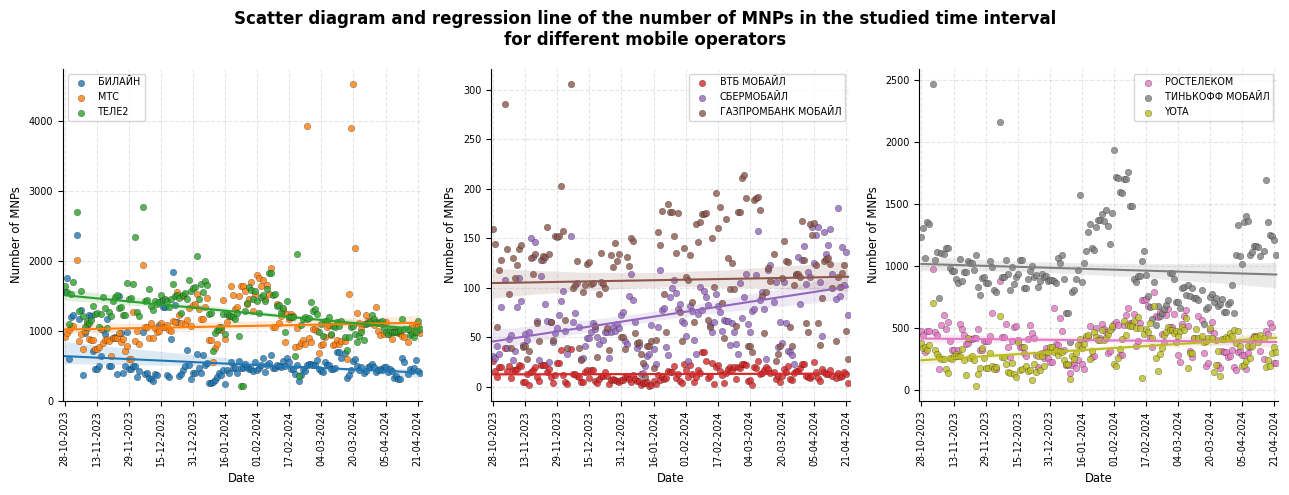

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (13,5))
fig.suptitle('Scatter diagram and regression line of the number of MNPs in the studied time interval\nfor different mobile operators',
             fontweight ="bold", fontsize='large')

oper_list = [['БИЛАЙН', 'МТС', 'ТЕЛЕ2'],
             ['ВТБ МОБАЙЛ', 'СБЕРМОБАЙЛ', 'ГАЗПРОМБАНК МОБАЙЛ'],
             ['РОСТЕЛЕКОМ', 'ТИНЬКОФФ МОБАЙЛ', 'YOTA']]
col = 0
for i in range(len(oper_list)):
  for k in oper_list[i]:
    df = data.query('goback == False and brend == @k').loc[: , ['date', 'brend']].groupby('date',
                    as_index=False)['brend'].count()
    df['date'] = pd.to_datetime(df['date']).map(dts.date2num)
    sns.regplot(x='date', y='brend', data=df, ax=ax[i], label=k,
                scatter_kws={'s':22, 'edgecolor': 'black', 'linewidths': 0.2, 'color': sns.color_palette()[col]},
                line_kws={'linewidth':1.5, 'color': sns.color_palette()[col]}, robust=True)
    col += 1
  ax[i].spines[['right', 'top']].set_visible(False)
  ax[i].set_xlim([min(df['date']) - 1, max(df['date']) + 1])
  ax[i].set_xticks(np.arange(min(df['date']), max(df['date']), 16))
  ax[i].xaxis.set_major_formatter(dts.DateFormatter('%d-%m-%Y'))
  ax[i].tick_params(axis='x', labelsize='x-small', rotation=90)
  ax[i].tick_params(axis='y', labelsize='x-small')
  ax[i].legend(fontsize='x-small')
  ax[i].set_xlabel('Date', fontdict={'fontsize': 'small', 'fontweight': 'normal'})
  ax[i].set_ylabel('Number of MNPs', fontdict={'fontsize': 'small', 'fontweight': 'normal'})
  ax[i].grid(True, which='both', color='#999999', linestyle='--', alpha=0.25)
fig.tight_layout()
plt.show()

На основании полученных графиков трудно утверждать о наличии или отстутствии корреляции по количеству MNP между различными сотовыми операторами.

Рассмотрим корреляцию средних долей количества переносов мобильных номеров к новым операторам, причем будем смотреть на среднее сглаженное за первые `window` дней с коэффициентом сглаживания `alpha`.
Для этого напишем функцию `cacl_operators_correlations(data, method, window, alpha)`. Также для полученных коэффициентов корреляции рассчитаем значение p-value при помощи функции `calc_p_value(df)`. Для этого используем модуль **SCIPY.STATS**



In [36]:
def cacl_operators_correlations(data, method, window, alpha):
    oper_corr, K = pd.DataFrame(), 10
    if method == 'all': q_st = 'goback == False'
    elif method == 'mno': q_st, K = 'goback == False and type == "mno"', 8
    elif method == 'mvno' : q_st = 'goback == False and type != "mno"'

    df_total_transfers = data.loc[data.goback==False, ['date', 'mnc']].groupby('date').count().rename(columns={'mnc': 'total'})
    # Create a group of top operators by number of transfers
    top10_operators = data.query(q_st).loc[:, ['brend', 'mnc']].groupby('brend',
                          as_index=False)['mnc'].count().sort_values('mnc', ascending=False)[:K].brend.tolist()
    for i in  top10_operators:
        df = data.query('goback == False and brend == @i').loc[: , ['date', 'brend']].groupby('date',
                    as_index=False)['brend'].count().rename(columns={'brend': 'total'})
        df.set_index('date', inplace=True)
        da = pd.merge(df, df_total_transfers, left_index=True, right_index=True, suffixes=('_oper', '_full'))
        da['share'] = da.total_oper / da.total_full
        oper_corr = pd.concat([oper_corr, da.share.ewm(min_periods = window,
                    alpha = alpha).mean().reset_index().set_index('date').rename(columns = {'share' : i})], axis=1)
    return oper_corr

def calc_p_value(x,y): # функция для расчета p-value
  if round(pearsonr(x,y)[1], 3) < 0.05 : return 1
  else: return 2

Выполним функцию `cacl_operators_correlations(data, method, window, alpha)` для создания корреляционной матрицы и расчета `p-value` для трех случаев: TOP 10 операторов (MNO и MVNO) по количеству переносов, ТОП 8 операторов MNO и ТОП 10 операторов MVNO. Для проверки нулевой гипотезы "распределение долей переносов мобильных номеров между операторами не связаны" рассчитаем значений `p-value`, уровень значимости примем равным `0.05`.

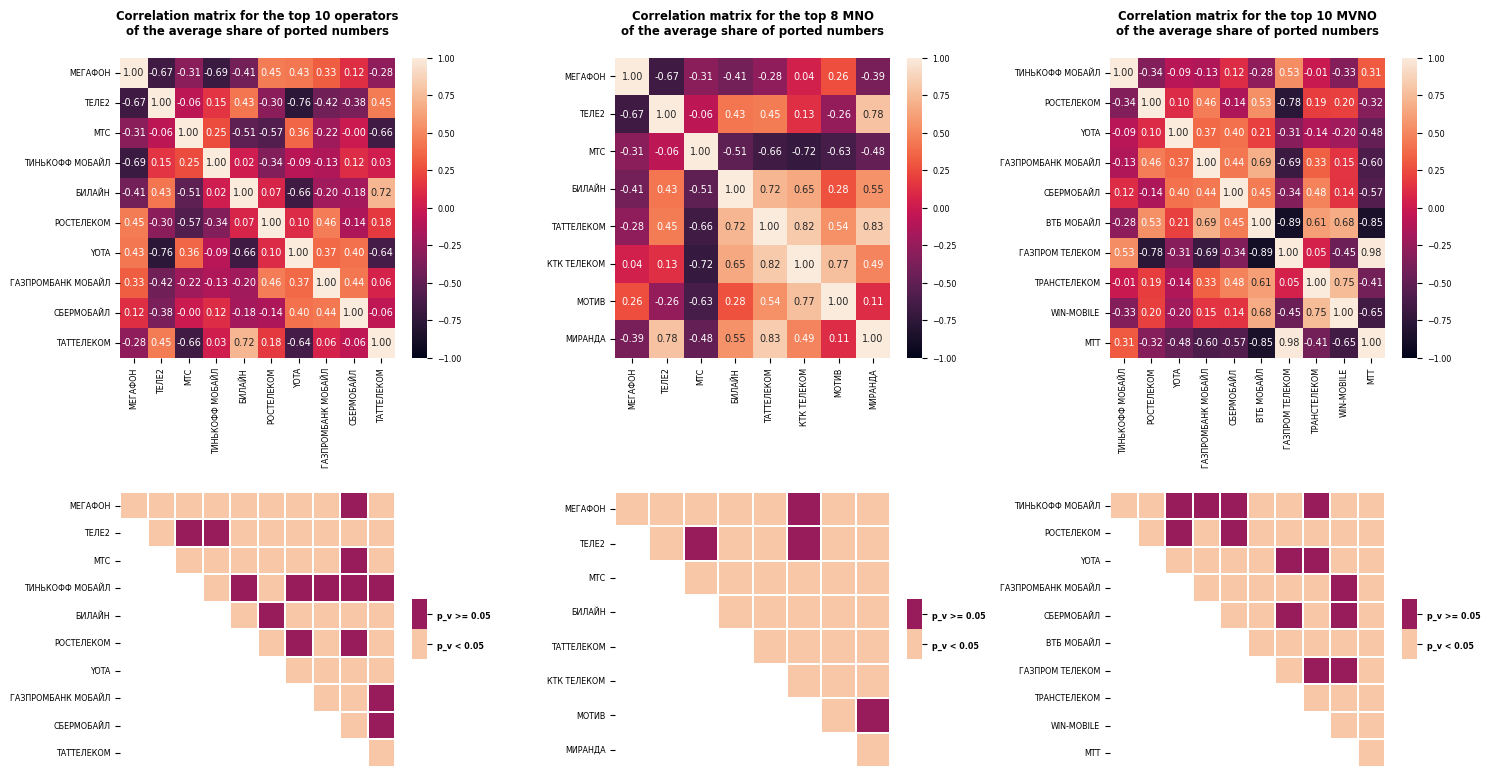

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
oper_list = ['all', 'mno', 'mvno']
axis_number = [[6, 7], [8, 9], [10, 11]]
color_list = [mpl.colors.to_rgba('#F7C7A8', alpha=1), mpl.colors.to_rgba('#981B5B', alpha=1)]
cmap = mpl.colors.ListedColormap(color_list)
title_list=['Correlation matrix for the top 10 operators\nof the average share of ported numbers\n',
             'Correlation matrix for the top 8 MNO\nof the average share of ported numbers\n',
             'Correlation matrix for the top 10 MVNO\nof the average share of ported numbers\n']
for i in range(len(oper_list)):
  correlations = cacl_operators_correlations(data, method=oper_list[i], window=10, alpha=0.1)
  p_v_operators = correlations.corr(method=calc_p_value)
  mask = np.tril(np.ones_like(p_v_operators, dtype=bool))
  mask[np.diag_indices_from(mask)] = False
  correlations = correlations.corr(numeric_only=False)
  sns.heatmap(correlations, vmin=-1, vmax=1, annot = True, annot_kws={"fontsize":7}, fmt=".2f", ax=ax[0, i])
  sns.heatmap(p_v_operators,  vmin=1, vmax=2, annot = False, cbar_kws={'shrink': 0.2, 'aspect': 4}, square=True,
              annot_kws={"fontsize":7},  ax=ax[1, i], cmap=cmap, mask=mask, linewidths =0.05, linecolor='white')
  ax[0, i].tick_params(axis='both', labelsize='xx-small')
  ax[0, i].set_title(title_list[i], fontdict={'fontsize':'small', 'fontweight':'bold'})
  ax[0, i].figure.axes[axis_number[i][0]].tick_params(labelsize='xx-small')
  ax[1, i].tick_params(axis='both', labelsize='xx-small')
  ax[1, i].set_xticks([])
  ax[1, i].figure.axes[axis_number[i][1]].set_yticks(ticks=[1.25, 1.75], labels= ['p_v < 0.05', 'p_v >= 0.05'],
                                                     fontdict={'fontsize':'xx-small', 'fontweight':'bold'})
plt.tight_layout()
plt.show()

Наши расчеты показывают, что в большинстве случаев нулевая гипотеза отвергается и распределение долей переносов мобильных номеров между различными операторами связаны.

Произведем такие же расчеты для регионов России.

Рассмотрим корреляцию средних долей переносов мобильных номеров по регионам, так же будем смотреть на среднее сглаженное за первые `window` дней с коэффициентом сглаживания `alpha` для ТОП 15 `regions` по количеству перенесенных номеров.<br>
Для этого напишем функцию `cacl_regions_correlations(data, window, alpha, regions)`. Для получения наименований регионов используем справочник `regions`, который мы сохранили в **SQL** базу `mnp.db`.

In [38]:
def cacl_regions_correlations(data, window, alpha, regions):
    conn = sqlite3.connect('mnp.db')
    cur = conn.cursor()
    oper_corr =pd.DataFrame()
    sql_query = """SELECT region FROM regions WHERE id_region = ?"""

    df_total_transfers = data.loc[data.goback==False, ['date', 'mnc']].groupby('date').count().rename(columns={'mnc': 'total'})

    # Create a group of top K regions by number of transfers
    top15_regions = data.query('goback == False').loc[:, ['id_region', 'mnc']].groupby('id_region',
                          as_index=False)['mnc'].count().sort_values('mnc', ascending=False)[:regions].id_region.tolist()

    for i in  top15_regions:
        df = data.query('goback == False and id_region == @i').loc[: , ['date', 'brend']].groupby('date',
                    as_index=False)['brend'].count().rename(columns={'brend': 'total'})
        df.set_index('date', inplace=True)
        df = pd.merge(df, df_total_transfers, left_index=True, right_index=True, suffixes=('_oper', '_full'))
        df['share'] = df.total_oper / df.total_full

        # Get name region from SQL 'mnp.db'
        cur.execute(sql_query, (i,))

        oper_corr = pd.concat([oper_corr, df.share.ewm(min_periods = window,
                    alpha = alpha).mean().reset_index().set_index('date').rename(columns = {'share' : cur.fetchone()[0]})], axis=1)
    conn.close()
    return oper_corr

Выполним функцию `cacl_regions_correlations(data, window, alpha, regions)` и посмотрим результат, заодно рассчитаем значения p-value для коэффициентов корреляции с целью проверки нулевой гипотезы: распределение долей переносов мобильных номеров между регионами не связаны.Уровень значимости примем равным `0.05`.

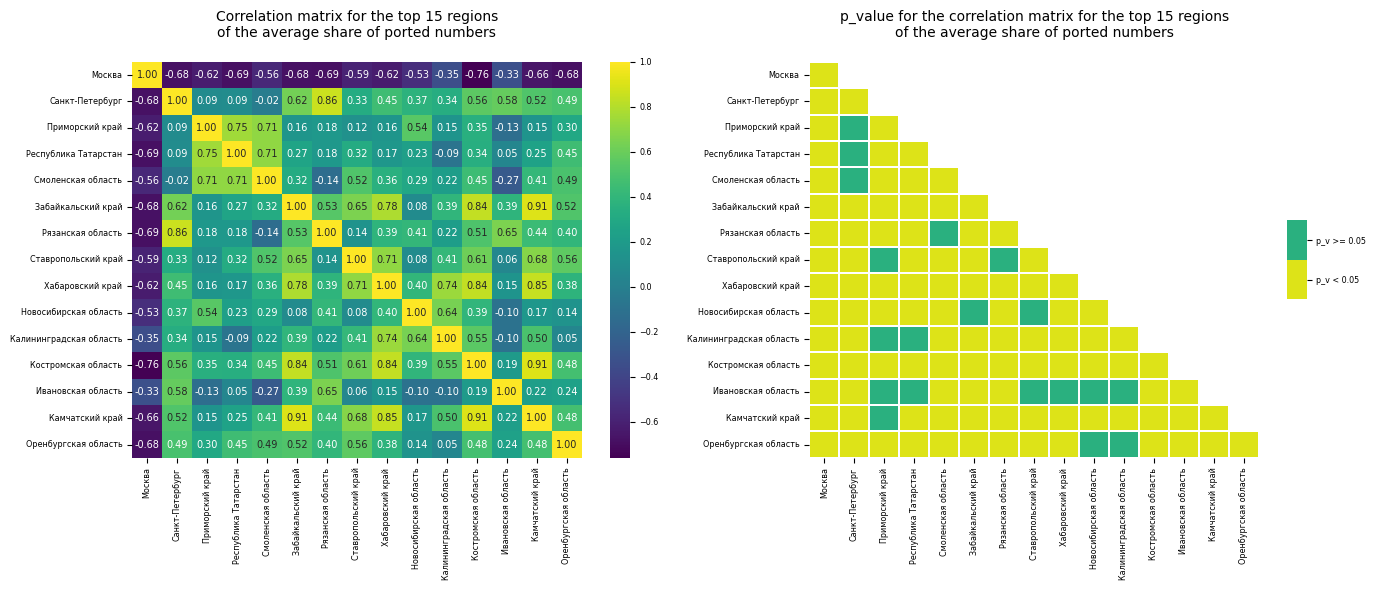

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
count_regions = 15 # count regions for matrix
correlations = cacl_regions_correlations(data, window=10, alpha=0.1, regions = count_regions)
p_v_regions=correlations.corr(method=calc_p_value)
correlations = correlations.corr(numeric_only=False)
sns.heatmap(correlations, vmin=correlations.values.min(), vmax=1, annot = True, annot_kws={"fontsize":7}, fmt=".2f", ax=ax[0], cmap='viridis')

mask = np.triu(np.ones_like(p_v_regions, dtype=bool))
mask[np.diag_indices_from(mask)] = False
color_list = [mpl.colors.to_rgba('#DDE318', alpha=1), mpl.colors.to_rgba('#2AB07F', alpha=1)]
cmap = mpl.colors.ListedColormap(color_list)
sns.heatmap(p_v_regions, vmin=1, vmax=2, annot = False, cbar_kws={'shrink': 0.2, 'aspect': 4},
            annot_kws={"fontsize":7},  ax=ax[1], cmap=cmap, mask=mask,#, fmt=".3f",
            linewidths =0.05, linecolor='white')

ax[0].tick_params(axis='both', labelsize='xx-small')
ax[0].set_title(f'Correlation matrix for the top {count_regions} regions\nof the average share of ported numbers\n',
                fontdict={'fontsize':'medium'})
ax[0].figure.axes[2].tick_params(labelsize='xx-small')
ax[1].tick_params(axis='both', labelsize='xx-small')
ax[1].figure.axes[3].set_yticks(ticks=[1.25, 1.75], labels= ['p_v < 0.05', 'p_v >= 0.05'])
ax[1].set_title(f'p_value for the correlation matrix for the top {count_regions} regions\nof the average share of ported numbers\n',
                fontdict={'fontsize':'medium'} )
ax[1].figure.axes[3].tick_params(labelsize='xx-small')

plt.tight_layout()
plt.show()

Как и в предыдущем случае для операторов, наши расчеты показывают, что в большинстве случаев нулевая гипотеза отвергается и распределение долей переносов мобильных номеров между различными регионами связаны.

<hr size="3" color="black" />

**ИССЛЕДОВАНИЕ MNP.** Построение Graph с использованием библиотеки networkx.

Проведем исследование, в рамках которого определим для каждой сотовой компании количество операторов, к которым переходили и от которых приходили абоненты. Для этого выполним следующий код.

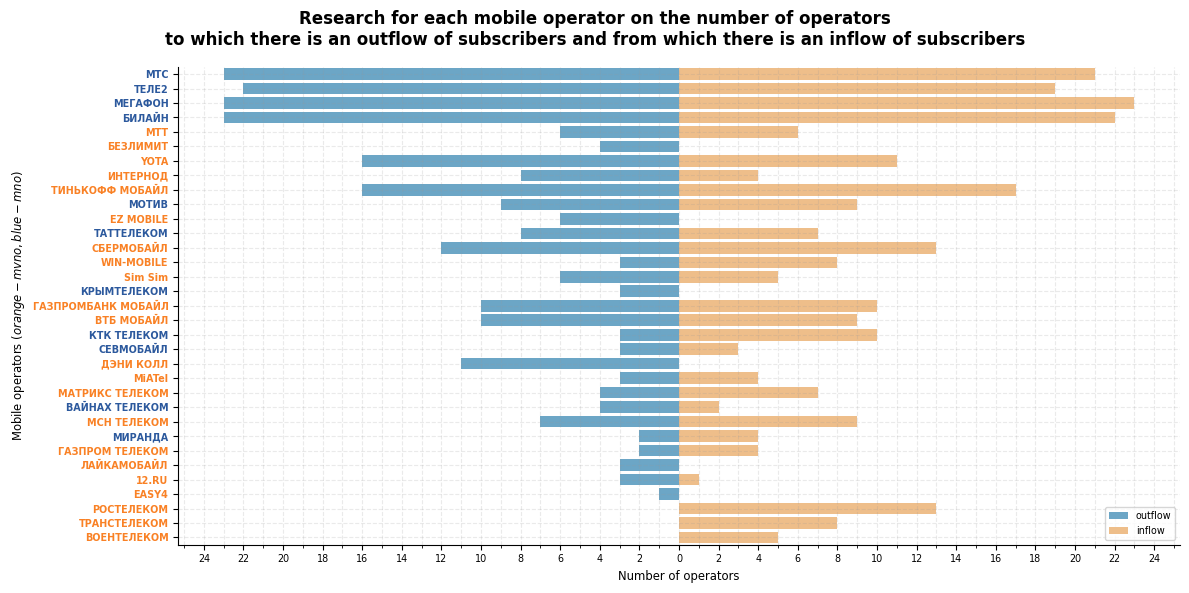

In [40]:
fig, ax = plt.subplots(figsize = (12,6))
fig.suptitle('Research for each mobile operator on the number of operators\nto which there is an outflow of subscribers and from which there is an inflow of subscribers',
             fontweight ="bold", fontsize='large')
order = ['outflow', 'inflow']
colors = ['#5DABD5', '#FFBE79']
method_col = [['brend_h', 'type_h', 'brend'], ['brend', 'type', 'brend_h']]
multiplier = [-1, 1]
label = []

def get_count_operators(operator, col_from, col_in):
    return len(data[(data.goback==False) & (data[col_from] == operator)].groupby([col_in], as_index=False).size()[col_in].values)

for i in range(len(order)):
    df = data[[method_col[i][0], method_col[i][1]]].value_counts().reset_index().iloc[:, :2]
    df['counts'] = df.apply(lambda x: get_count_operators(x[method_col[i][0]], method_col[i][0], method_col[i][2]), axis=1)
    label += df[[method_col[i][0], method_col[i][1]]].values.tolist()
    df['counts_bar'] = df['counts'].apply(lambda x: x*multiplier[i])
    ax = sns.barplot(x='counts_bar', y=method_col[i][0], data=df, color=colors[i], label=order[i])

# Decoration
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.set_xticks(ax.get_xticks().tolist()[1:-1])
ax.xaxis.set_minor_locator(MultipleLocator(1))
labels_x = [re.sub('[^0-9]', '', item.get_text()) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels_x)

label= {i.pop(0): i.pop(0) for i in label}
for i in ax.yaxis.get_ticklabels():
    i.set_color('#2C599D' if 'mno' in label[i.get_text()] else '#F98125')
    i.set_fontweight('bold')

ax.tick_params(axis='both', labelsize='x-small')
ax.set_xlabel('Number of operators', fontdict={'fontsize': 'small', 'fontweight': 'normal'})
ax.set_ylabel(f'Mobile operators {r"$(orange - mvno, blue - mno)$"}', fontdict={'fontsize': 'small', 'fontweight': 'normal'})
ax.grid(True, which='both', color='#999999', linestyle='--', alpha=0.2)
ax.legend(loc='lower right', fontsize='x-small')
ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()
plt.show()

На диаграмме мы видим, что переносы мобильных номеров происходят между большим количеством различных операторов.

Выполним визуализацию, показывающую связь операторов по взаимному переходу абонентов в виде **GRAPH**. Для этого построим ориентированный Graph, на котором будем отображать направление перехода абонентов. Ребра Graph покрасим в разные цвета в зависимости от количества перенесенных номеров. Для облегчения Graph введем ограничение: минимальное количество переносов между операторами абонентов равно 100.

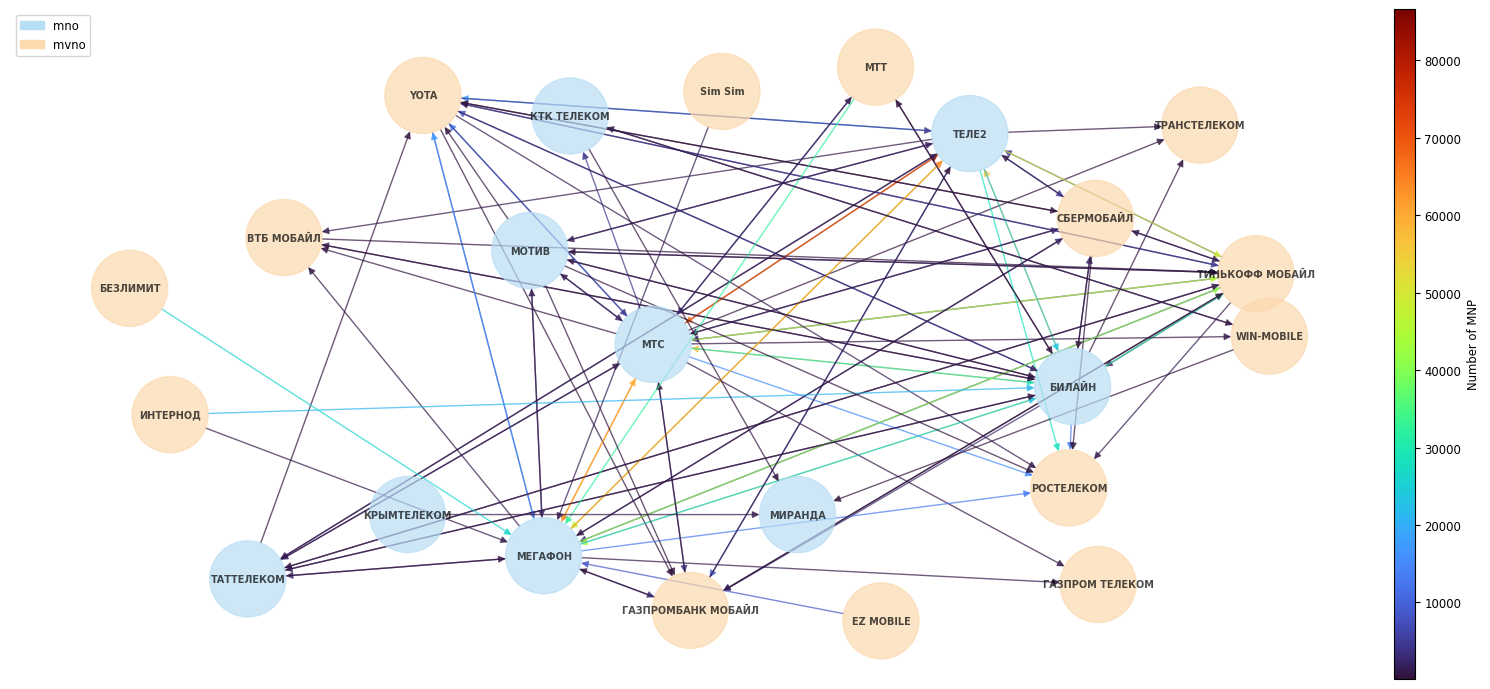

In [18]:
Gr = nx.DiGraph()
list_operators_h = []
list_operators = []

min_MNP = 100 # минимальное количество переносов номеров между операторами
df = data.loc[data.goback == False, ['brend_h', 'brend', 'type_h', 'type']]

# список уникальных домашних операторов outflow
for i in df.drop_duplicates(subset=['brend_h', 'type_h'])[['brend_h', 'type_h']].values.tolist():
    list_operators_h.append((i[0], {'type' : i[1]}))
# список уникальных операторов inflow
for i in df.drop_duplicates(subset=['brend', 'type'])[['brend', 'type']].values.tolist():
    list_operators.append((i[0], {'type' : i[1]}))

df = df[['brend_h', 'brend']]
list_edges = [] # список кортежей для хранения ребер Графа

for operator_h in list_operators_h:
    da = df[df.brend_h == operator_h[0]].groupby(['brend'], as_index=False).count()
    operators_outflow = da[da.brend_h > min_MNP].values.tolist()
    for i in range(len(operators_outflow)):
        if operator_h[0] != operators_outflow[i][0]:
            list_edges.append((operator_h[0], operators_outflow[i][0], {'count' : operators_outflow[i][1]}))

for operator in list_operators:
    da = df[df.brend == operator[0]].groupby(['brend_h'], as_index=False).count()
    operators_inflow = da[da.brend > min_MNP].values.tolist()
    for i in range(len(operators_inflow)):
        if operator[0] != operators_inflow[i][0]:
            list_edges.append((operators_inflow[i][0], operator[0], {'count' : operators_inflow[i][1]}))

fig, ax = plt.subplots(figsize = (15,7))

Gr.add_nodes_from(list_operators_h + list_operators)
Gr.add_edges_from(list_edges)
Gr.remove_nodes_from(list(nx.isolates(Gr))) # удалим изолированные вершины

cmap = plt.get_cmap('turbo')
colors_nodes = []
# Определяем цвет nodes в зависмости от типа операторов
for i in list(nx.get_node_attributes(Gr, 'type').values()):
    colors_nodes.append('#b8def5' if i == 'mno' else '#fcd9ae')
# Определяем цвет edges в зависмости от кол-ва переносов номеров
count_edges = list(nx.get_edge_attributes(Gr, 'count').values())
colors_edges = [cmap(edge/max(count_edges)) for edge in count_edges]

pos = nx.spring_layout(Gr, k=1, iterations=10, scale=1)
nx.draw_networkx(Gr, node_color = colors_nodes, alpha = 0.7, with_labels = True, pos=pos,
                 edge_color = colors_edges, node_size=3000, edge_cmap=cmap,
                 edge_vmin=min(count_edges), edge_vmax=max(count_edges),
                 font_size=7, font_color='black', font_weight='bold', ax=ax)
                 #connectionstyle='arc3,rad=0.3', )

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(count_edges), vmax=max(count_edges)))
sm.set_array([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1.5%", pad=0.05)

# создать легенду
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Number of MNP', fontsize='small')
ax.figure.axes[1].tick_params(labelsize='small')

mno_legend = mpatches.Patch(color='#b8def5', label='mno')
mvno_legend = mpatches.Patch(color='#fcd9ae', label='mvno')
ax.legend(handles=[mno_legend, mvno_legend], loc='upper left', fontsize='small')

ax.axis('off')
fig.tight_layout()
plt.show()

Проанализируем построенный нами граф. Его вид подтверждает наш вывод о том, что наибольший приток абонентов приходится на классических операторов большой четверки (Билайн, Мегафон, МТС и ТЕЛЕ2) и виртуальные операторы Тинькофф Мобайл и Yota.

<hr size="3" color="black" />

**ИССЛЕДОВАНИЕ MNP.** Машинное обучение.

Как я писала ранее, мой основной Dataframe имеет ограниченное количество параметров, большинство из которых категориальные. Если бы у меня была возможность получить персональные данные владельца каждого телефонного номера, который осуществлял его перенос, то можно было бы не только использовать различные модели машинного обучения, но и провести интересные социальные исследования.

Будем использовать, то что у нас есть. Мой основной DataFrame имеет следующую структуру данных:

In [ ]:
data.head(5)

,date,mcc,phone,defcode,number,mnc_h,brend_h,type_h,mnc,brend,type,id_region,goback
0,2023-10-28,250,79935293458,993,5293458,62,ТИНЬКОФФ МОБАЙЛ,fullmvno,11,YOTA,fullmvno,18,False
1,2023-10-28,250,79033101929,903,3101929,99,БИЛАЙН,mno,11,YOTA,fullmvno,3,False
2,2023-10-28,250,79958642628,995,8642628,62,ТИНЬКОФФ МОБАЙЛ,fullmvno,11,YOTA,fullmvno,27,False
3,2023-10-28,250,79121642452,912,1642452,1,МТС,mno,45,ГАЗПРОМБАНК МОБАЙЛ,fullmvno,11,False
4,2023-10-28,250,79042741697,904,2741697,20,ТЕЛЕ2,mno,45,ГАЗПРОМБАНК МОБАЙЛ,fullmvno,11,False


Одни параметры Dataframe являются уникальными (например, номер телефона), другие жестко связаны друг с другом, например:


*   `brend_h`, `mnc_h`, `type_h`
*   `brend`, `mnc`, `type`

Так как основной Dataframe я конструировала самостоятельно, то его структура определялась составом доступной мне информации и созданием максимальной гибкости для ее визуализации.

Для машинного обучения я буду использовать следующие данные:


In [ ]:
data[['id_region', 'type_h', 'type']].head(5)

,id_region,type_h,type
0,18,fullmvno,fullmvno
1,3,mno,fullmvno
2,27,fullmvno,fullmvno
3,11,mno,fullmvno
4,11,mno,fullmvno


Я попробую построить модель, предсказывающую к какому типу оператора `type` (MNO или MVNO) будет перенесен телефонный номер в регионе `id_region` от типа оператора `type_h` (MNO или MVNO).

Я понимаю, что при таком количестве параметров построить хорошо работающую модель невозможно, но в рамках этого задания я хочу продемонстировать свои знания и умения в этой области.

Все параметры категориальные. Я буду использовать несколько моделей из разных библиотек и в дальнейшем буду сравнивать результаты их работы.

Используемые модели:


*   **KNeighborsClassifier** - модель K-ближайших соседей (библиотека **Sklearn**);
*   **RandomForestClassifier** - модель случайного леса (библиотека **Sklearn**);
*   **LGBMClassifier** - - модель деревьев решений с градиентным бустингом (библиотека **LightGBM**);
*   **XGBClassifier** - модель деревьев решений с градиентным бустингом (библиотека **Xgboost**).



Подключим необходимые библиотеки и создадим список `my_models` с моделями, которые мы будем использовать.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

my_models=[] # список используемых моделей
n_estimators=100
my_models.append(('KNeighborsClassifier:   ', KNeighborsClassifier(n_neighbors=n_estimators)))
my_models.append(('RandomForestClassifier: ', RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1, criterion='gini')))
my_models.append(('LGBMClassifier:         ', lgb.LGBMClassifier(metric='auc', objective="binary", learning_rate=0.1, verbosity=-1,
                                                                force_row_wise=True, verbose_eval=False, n_estimators=n_estimators,
                                                                num_leaves=31)))#, is_unbalance=True)))
my_models.append(('XGBClassifier:          ', xgb.XGBClassifier(n_estimators=n_estimators, subsample=1, colsample_bytree=1, verbosity=0,
                                                    min_child_weight=1, max_depth=6, learning_rate=0.3)))

Подготовим данные для моделей.

In [ ]:
df = data.loc[data.goback == False, ['id_region', 'type_h', 'type']]
# заменим строковые значения на целочиленные
df['type_h'] = np.where(df.type_h == 'mno', 0, 1)
df['type'] = np.where(df.type == 'mno', 0, 1)

target = 'type'
features = ['id_region', 'type_h']
X = df[features]
y = df[target]

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Начнем работать с выбранными моделями машинного обучения.

Воспользуемся классом `StratifiedKFold` и методом кросс-валидации `cross_val_score` из библиотеки **Sklearn.model_selection**.  Метод кросс-валидации предназначен для оценки качества работы модели и помогает сравнить между собой различные модели и выбрать наилучшую для конкретной задачи прогнозного моделирования.

`cross_val_score` — это функция, которая генерирует перекрестно проверенную оценку точности для каждой точки данных нашего набора данных. Она разбивает набор данных на несколько подмножеств данных обучения и тестирования, обучает модель на каждом обучающем подмножестве, выполняет прогнозы для тестового подмножества и выводит оценку точности прогнозирования для каждого подмножества. Процесс повторяется в зависимости от количества установленных нами перекрестных проверок, который я определала в классе `StratifiedKFold`: *n_splits*=5.

In [ ]:
results = []
names = []

print('Сравнение точности прогнозирования для каждой модели:')
for name, model in my_models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Сравнение точности прогнозирования для каждой модели:
KNeighborsClassifier:    0.692666 (0.002029)
RandomForestClassifier:  0.696810 (0.000501)
LGBMClassifier:          0.696810 (0.000504)
XGBClassifier:           0.696809 (0.000504)


Тестирование моделей показало, что точность прогнозирования у каждой из них практически одинакова. Принцип прогнозирования у **KNeighborsClassifier** основан на модели К-ближайших соседей и ее точность хуже, чем у остальных трех моделей,
основанных на модели деревьев решений. С учетом того, что стандартное отклонение у модели **RandomForestClassifier** меньше, будем считать, что данная модель наиболее эффективна.

Выведем подробные характеристики выбранной модели:


In [ ]:
model = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1, criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Confusion matrix (0 - mno, 1 - mvno):')
print('-'*55)
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False))
print()
print('Classification report (0 - mno, 1 - mvno):')
print('-'*55)
print(classification_report(y_test, y_pred))
print('Feature importances:')
print('-'*55)
print(pd.DataFrame({'Parameter': features, 'Importance': model.feature_importances_}))

Confusion matrix (0 - mno, 1 - mvno):
-------------------------------------------------------
Predicted       0      1
Actual                  
0          146128   9552
1           57988  10436

Classification report (0 - mno, 1 - mvno):
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.94      0.81    155680
           1       0.52      0.15      0.24     68424

    accuracy                           0.70    224104
   macro avg       0.62      0.55      0.52    224104
weighted avg       0.66      0.70      0.64    224104

Feature importances:
-------------------------------------------------------
   Parameter  Importance
0  id_region    0.616277
1     type_h    0.383723


**Confusion matrix:** данные матрицы демонстрируют нам точность прогнозирования нашей модели, а именно количество раз, когда она угадала, к какому виду мобильного оператора перейдет абонент при переносе номера.

**Classification report:** наиболее интересующим нас показателем является f1-score, который демонстрирует качество работы нашей модели. Чем ближе его значение к 1, тем качественнее прогнозирование модели. Из полученных данных мы можем сделать вывод, что модель точнее прогнозирует переход к классическим операторам мобильной связи (f1-score = 0.81), чем к виртуальным оператором (f1-score = 0.24).

**Feature importance:** данная таблица показывает нам, какой из используемых при построении модели параметров оказал большее влияние на качество работы модели. Мы видим, что регион `id_region` имеет больший вес, чем тип домашнего оператора `type_h`.


<hr size="3" color="black" />

<font size=6>**Выводы**



1. Я провела исследование уcлуги переноса мобильного номера (MNP) за период с
c 2023-10-28 по 2024-04-22 (177 дней). Количество перенесенных номеров за исследуемый период: 1,224,573.

2. Наибольшее количество абонентов переходило от классических (MNO) мобильных операторов большой четверки. Лидером по оттоку пользователей является МТС из MNO операторов и Межрегиональный транзит телеком (МТТ) среди MVNO операторов.
Каждый третий абонент, который переходил от классических операторов, выбирал виртуального оператора.

3. Лидерами по притоку абонентов являются: Мегафон из MNO операторов и Тинькофф Мобайл среди MVNO операторов.

4. АБСОЛЮТНЫМ ЛИДЕРОМ по увеличению абонентской базы, связанному с переносами мобильных номеров, является виртуальный оператор Тинькофф Мобайл. Кроме того, в ТОП-7 входят 5 виртуальных операторов. С большим отставанием от Тинькофф Мобайл и Ростелеком в тройку лидеров вошел только один оператор из большой четверки - компания Мегафон. АБСОЛЮТНЫМ АУТСАЙДЕРОМ, потерявшим больше всего абонентов, стал оператор мобильной связи Билайн.

5.  За исследуемый временной период абоненты мобильных операторов активно пользовались услугой MNP практически на всей территории России, включая КРЫМ и Луганскую Народную Республику. Исключения составили только: Магаданская область, Нижегородская область, Чукотский автономный округ, Ханты-Мансийский автономный округ и Ямало-Ненецкий автономный округ. Лидерами по количеству переносов номеров стали Москва, Санкт-Петербург и Приморский край. Однако при расcмотрении количества переносов номеров в расчете на душу населения, лидерами среди регионов являются: Ненецкий автономный округ, Камчатский край и Смоленская область.

6. При исследовании MNP  были построены корреляционные матрицы для средних долей переносов мобильных номеров среди операторов и по регионам. Выполнено построение графа взаимного перехода абонентов между операторами. Были использованы различные модели машинного обучения и проведен сравнительный анализ между ними.

7. По данным исследований консалтинговой компании TМ-консалтинг доля абонентов виртуальных мобильных операторов на конец 2023 года превысила 11% от общего количества пользователей сотовой связи по сравнению с 6 % в 2021 году. Данный показатель превышает мировой показатель (7%). Этот факт говорит о росте популярности услуг мобильной связи, предоставляемых виртуальными операторами, которые предлагают более выгодные и гибкие тарифы, набор услуг, недоступный пользователям классических операторов сотовой связи. Мое исследование также демострирует рост популярности виртуальных операторов. Компания Тинькофф Мобайл обгоняет по притоку абонентов операторов большой четверки.
